# STAT 4010/5010 Final Project
# Statistical Analysis of Baseball Performance Metrics: Findings on Hitting, Pitching, and Salary Predictors
## Dr. Osita Onyejekwe
### By Kathryn Stewart, Annika Strom, and Anya Lee

# Install Packages, Import Libraries, and Load Data

In [ ]:
# Install any unknown packages
install.packages("leaps")
install.packages("car")
install.packages("reshape2")
install.packages("pheatmap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘pbkrtest’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Import libraries / load packages
library(ggplot2) # For plotting
library(MASS)  # For stepwise regression
library(leaps) # For all subsets regression
library(car) # For the vif() function
library(dplyr) # For data manipulation
library(reshape2) # For correlation heat map, to reshape data
library(pheatmap) # To visualize heat map
library(tidyr) # For data cleaning/removing columns

Loading required package: carData


Attaching package: ‘dplyr’


The following object is masked from ‘package:car’:

    recode


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘tidyr’


The following object is masked from ‘package:reshape2’:

    smiths




In [ ]:
# Read CSV files
pitching_data <- read.csv('Pitching.csv')
fielding_data <- read.csv('Fielding.csv')
batting_data <- read.csv('Batting.csv')
salary_data <- read.csv('Salaries.csv')

# View each datasets
head(pitching_data)
head(fielding_data)
head(batting_data)
head(salary_data)

# Get column names of each dataset
colnames(pitching_data)
colnames(fielding_data)
colnames(batting_data)
colnames(salary_data)

# Number of data points for each file
nrow(pitching_data)
nrow(fielding_data)
nrow(batting_data)
nrow(salary_data)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,⋯,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,bechtge01,1871,1,PH1,NA,1,2,3,3,2,⋯,NA,NA,NA,0,NA,NA,42,NA,NA,NA
2,brainas01,1871,1,WS3,NA,12,15,30,30,30,⋯,NA,NA,NA,0,NA,NA,292,NA,NA,NA
3,fergubo01,1871,1,NY2,NA,0,0,1,0,0,⋯,NA,NA,NA,0,NA,NA,9,NA,NA,NA
4,fishech01,1871,1,RC1,NA,4,16,24,24,22,⋯,NA,NA,NA,0,NA,NA,257,NA,NA,NA
5,fleetfr01,1871,1,NY2,NA,0,1,1,1,1,⋯,NA,NA,NA,0,NA,NA,21,NA,NA,NA
6,flowedi01,1871,1,TRO,NA,0,0,1,0,0,⋯,NA,NA,NA,0,NA,NA,0,NA,NA,NA


,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,abercda01,1871,1,TRO,NA,SS,1,NA,NA,1,3,2,0,NA,NA,NA,NA,NA
2,addybo01,1871,1,RC1,NA,2B,22,NA,NA,67,72,42,5,NA,NA,NA,NA,NA
3,addybo01,1871,1,RC1,NA,SS,3,NA,NA,8,14,7,0,NA,NA,NA,NA,NA
4,allisar01,1871,1,CL1,NA,2B,2,NA,NA,1,4,0,0,NA,NA,NA,NA,NA
5,allisar01,1871,1,CL1,NA,OF,29,NA,NA,51,3,7,1,NA,NA,NA,NA,NA
6,allisdo01,1871,1,WS3,NA,C,27,NA,NA,68,15,20,4,0,NA,NA,NA,NA


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,X2B,⋯,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,abercda01,1871,1,TRO,NA,1,4,0,0,0,⋯,0,0,0,0,0,NA,NA,NA,NA,NA
2,addybo01,1871,1,RC1,NA,25,118,30,32,6,⋯,13,8,1,4,0,NA,NA,NA,NA,NA
3,allisar01,1871,1,CL1,NA,29,137,28,40,4,⋯,19,3,1,2,5,NA,NA,NA,NA,NA
4,allisdo01,1871,1,WS3,NA,27,133,28,44,10,⋯,27,1,1,0,2,NA,NA,NA,NA,NA
5,ansonca01,1871,1,RC1,NA,25,120,29,39,11,⋯,16,6,2,2,1,NA,NA,NA,NA,NA
6,armstbo01,1871,1,FW1,NA,12,49,9,11,2,⋯,5,0,1,0,1,NA,NA,NA,NA,NA


,yearID,teamID,lgID,playerID,salary
,<int>,<chr>,<chr>,<chr>,<int>
1,1985,ATL,NL,barkele01,870000
2,1985,ATL,NL,bedrost01,550000
3,1985,ATL,NL,benedbr01,545000
4,1985,ATL,NL,campri01,633333
5,1985,ATL,NL,ceronri01,625000
6,1985,ATL,NL,chambch01,800000


[1] "playerID" "yearID"   "stint"    "teamID"   "lgID"     "W"       
 [7] "L"        "G"        "GS"       "CG"       "SHO"      "SV"      
[13] "IPouts"   "H"        "ER"       "HR"       "BB"       "SO"      
[19] "BAOpp"    "ERA"      "IBB"      "WP"       "HBP"      "BK"      
[25] "BFP"      "GF"       "R"        "SH"       "SF"       "GIDP"

[1] "playerID" "yearID"   "stint"    "teamID"   "lgID"     "POS"     
 [7] "G"        "GS"       "InnOuts"  "PO"       "A"        "E"       
[13] "DP"       "PB"       "WP"       "SB"       "CS"       "ZR"

[1] "playerID" "yearID"   "stint"    "teamID"   "lgID"     "G"       
 [7] "AB"       "R"        "H"        "X2B"      "X3B"      "HR"      
[13] "RBI"      "SB"       "CS"       "BB"       "SO"       "IBB"     
[19] "HBP"      "SH"       "SF"       "GIDP"

[1] "yearID"   "teamID"   "lgID"     "playerID" "salary"

[1] 44139

[1] 170526

[1] 101332

[1] 25575

# Data Cleaning: Missing Values, Duplicates, Data Types

In [ ]:
# Data Cleaning: Check for Missing Values (NA)
sapply(pitching_data, function(x) sum(is.na(x)))
sapply(fielding_data, function(x) sum(is.na(x)))
sapply(batting_data, function(x) sum(is.na(x)))
sapply(salary_data, function(x) sum(is.na(x)))

playerID   yearID    stint   teamID     lgID        W        L        G 
       0        0        0        0      131        0        0        0 
      GS       CG      SHO       SV   IPouts        H       ER       HR 
       0        0        0        0        1        0        0        0 
      BB       SO    BAOpp      ERA      IBB       WP      HBP       BK 
       0        0     1525       90    14575      133      559        0 
     BFP       GF        R       SH       SF     GIDP 
     239      133        0    32900    32900    43394

playerID   yearID    stint   teamID     lgID      POS        G       GS 
       0        0        0        0     1503        0        0    94677 
 InnOuts       PO        A        E       DP       PB       WP       SB 
   68213    14117    14118    14119    14118   159410   166337   164502 
      CS       ZR 
  164502   166337

playerID   yearID    stint   teamID     lgID        G       AB        R 
       0        0        0        0      737        0     5149     5149 
       H      X2B      X3B       HR      RBI       SB       CS       BB 
    5149     5149     5149     5149     5573     6449    28603     5149 
      SO      IBB      HBP       SH       SF     GIDP 
   12987    41712     7959    11487    41181    31257

yearID   teamID     lgID playerID   salary 
       0        0        0        0        0

In [ ]:
# Data Cleaning: Check for Duplicates
sum(duplicated(pitching_data))
sum(duplicated(fielding_data))
sum(duplicated(batting_data))
sum(duplicated(salary_data))

[1] 0

[1] 0

[1] 0

[1] 0

In [ ]:
# Data Cleaning: Check Data Types
str(pitching_data)
str(fielding_data)
str(batting_data)
str(salary_data)

'data.frame':	44139 obs. of  30 variables:
 $ playerID: chr  "bechtge01" "brainas01" "fergubo01" "fishech01" ...
 $ yearID  : int  1871 1871 1871 1871 1871 1871 1871 1871 1871 1871 ...
 $ stint   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ teamID  : chr  "PH1" "WS3" "NY2" "RC1" ...
 $ lgID    : chr  NA NA NA NA ...
 $ W       : int  1 12 0 4 0 0 0 6 18 12 ...
 $ L       : int  2 15 0 16 1 0 1 11 5 15 ...
 $ G       : int  3 30 1 24 1 1 3 19 25 29 ...
 $ GS      : int  3 30 0 24 1 0 1 19 25 29 ...
 $ CG      : int  2 30 0 22 1 0 1 19 25 28 ...
 $ SHO     : int  0 0 0 1 0 0 0 1 0 0 ...
 $ SV      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ IPouts  : int  78 792 3 639 27 3 39 507 666 747 ...
 $ H       : int  43 361 8 295 20 1 20 261 285 430 ...
 $ ER      : int  23 132 3 103 10 0 5 97 113 153 ...
 $ HR      : int  0 4 0 3 0 0 0 5 3 4 ...
 $ BB      : int  11 37 0 31 3 0 3 21 40 75 ...
 $ SO      : int  1 13 0 15 0 0 1 17 15 12 ...
 $ BAOpp   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ ERA     : num  7.96 4.

# Data Analysis Overview

## 1. Batting
*   Batting Average and On-Base-Percentage: Is there a relationship between batting average and ability to get on base?
*   Stolen Base Percentage and Runs Scored: Is there a relationship between speed on the bases and scoring efficiency?
*   Strikeouts and At-Bats: Visualize relationship between the two
*   Strikeout Percentage and Walk Rate for Batters
*   Predicting Strikeouts by a Batter

## 2. Pitching
*   Strikeout Percentage and Walk Rate, ERA: Evaluate basic pitching metrics
*   Strikeout to Walk Ratio Relative to Runs Allowed: Evaluate overall pitcher performance
*   Runs Allowed vs Walks: Does limiting number of walks decrease runs allowed?
*   Predicting Strikeouts by a Pitcher
*   Strikeouts vs ERA: Visualize relationship between the two.
*   Predicting Pitchers ERA: Which predictors are most relevant to pitching ERA?

## 3. Salaries, Fielding, and Batting
*   What position makes the most?
*   Are there any correlations between salary and fielding position? (excluding pitchers) -- correlation/heat map?
*   Predicting salary for pitchers. What are the most relevant predictors?
*   Predicting salary based on hitting/batting (excluding pitchers). What are the most significant predictors?
*   Which position has most HRs, has most triples, etc. Show via Histogram


# 1. Batting

### Batting Average and On-Base-Percentage: Is there a relationship between batting average and ability to get on base?


Call:
lm(formula = OBP ~ BA, data = batting_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.56784 -0.04269 -0.00401  0.02261  0.61437 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.052297   0.000471   111.0   <2e-16 ***
BA          1.015544   0.001974   514.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05579 on 50679 degrees of freedom
  (50651 observations deleted due to missingness)
Multiple R-squared:  0.8393,	Adjusted R-squared:  0.8393 
F-statistic: 2.646e+05 on 1 and 50679 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 50651 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 50651 rows containing missing values or values outside the scale range
(`geom_point()`).”


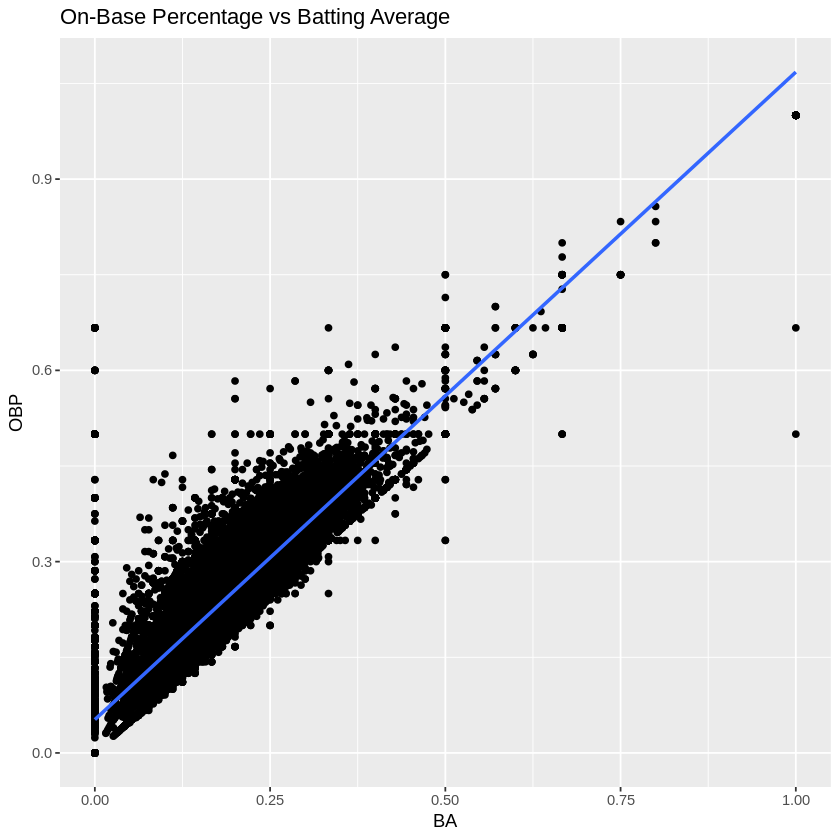

In [ ]:
# Batting: Batting Average and On-Base-Percentage
# Compute Batting Average (BA)
batting_data$BA <- batting_data$H / batting_data$AB
# Compute On-Base Percentage (OBP)
batting_data$OBP <- (batting_data$H + batting_data$BB + batting_data$HBP) / # H: hit, HBP: hit by pitch
                    (batting_data$AB + batting_data$BB + batting_data$HBP + batting_data$SF) # AB: at bats, BB: balls on base (walk), SF: sacrifice fly
# Linear model
lm_ba_obp <- lm(OBP ~ BA, data = batting_data)
summary(lm_ba_obp)

# Scatterplot with regression line
ggplot(batting_data, aes(x = BA, y = OBP)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "On-Base Percentage vs Batting Average")

It is clear that there is a positive linear relationship between On-Base Percentage and Batting Average represented by the line `OBP = 1.015544BA + 0.052297`. We can see this is reasonable because we have an adjusted $R^2$ value of `0.8393`, which is pretty high. This model can be interpreted as: For every one unit increase in Batting Average, the On-Base Percentage of a batter increases by `1.015544`.


### Stolen Base Percentage and Runs Scored: Is there a relationship between speed on the bases and scoring?


Call:
lm(formula = R ~ SB_percent, data = batting_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.742 -25.761  -6.039  21.886 136.583 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  34.7611     0.3576   97.22   <2e-16 ***
SB_percent    9.9810     0.5429   18.38   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.72 on 30949 degrees of freedom
  (70381 observations deleted due to missingness)
Multiple R-squared:  0.0108,	Adjusted R-squared:  0.01077 
F-statistic: 337.9 on 1 and 30949 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 70381 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 70381 rows containing missing values or values outside the scale range
(`geom_point()`).”


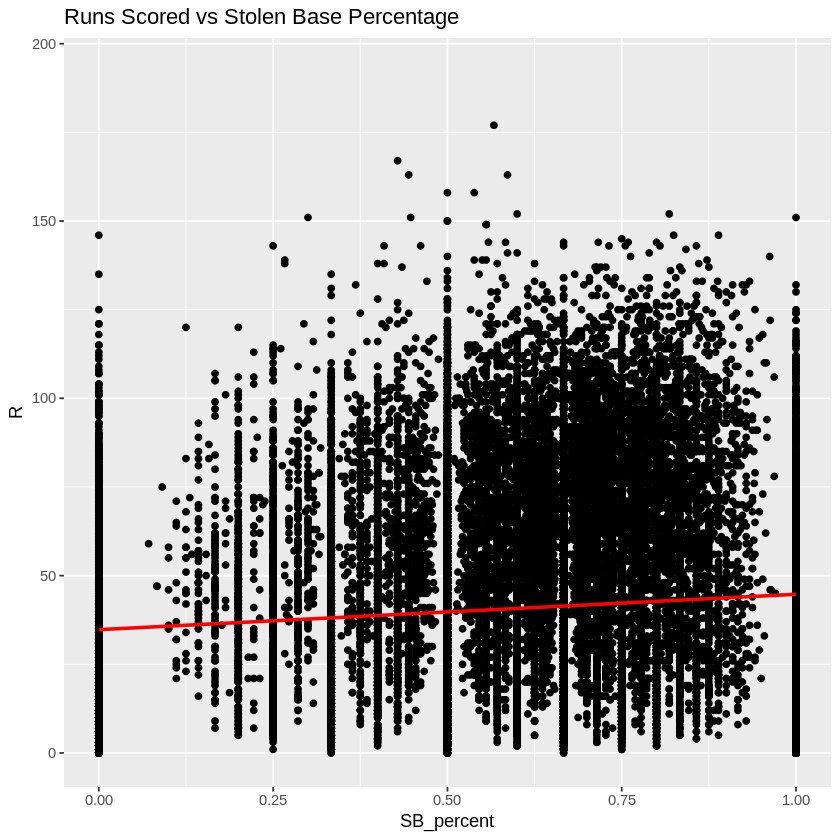

In [ ]:
# Batting: Stolen Base Percentage and Runs Scored
# Stolen Base Percentage (SB_percent) = stolen bases / (stolen bases + caught stealing)
batting_data$SB_percent <- batting_data$SB / (batting_data$SB + batting_data$CS)
# Linear model
lm_sb_runs <- lm(R ~ SB_percent, data = batting_data)
summary(lm_sb_runs)

# Scatterplot with regression line
ggplot(batting_data, aes(x = SB_percent, y = R)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color="red") +
  labs(title = "Runs Scored vs Stolen Base Percentage")

We can see this data has a significantly higher variance than the previous data. A linear model does not fit the data well since it is so scattered. We can see however that hitters with a relatively higher Stolen Base Percentage (greater than 50%) also scored more runs since many of the data points are clustered between 50% and 100% compared to the datapoints with a Stolen Base Percentage between 0% to 50%.


### Strikeouts and At-Bats: A Simple Visualization of the Relationship (if any)


Call:
lm(formula = SO ~ AB, data = batting_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-75.056  -3.557  -2.308   3.855 151.555 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.1830562  0.0700067   45.47   <2e-16 ***
AB          0.1247909  0.0002941  424.38   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.31 on 88343 degrees of freedom
  (12987 observations deleted due to missingness)
Multiple R-squared:  0.6709,	Adjusted R-squared:  0.6709 
F-statistic: 1.801e+05 on 1 and 88343 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 12987 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 12987 rows containing missing values or values outside the scale range
(`geom_point()`).”


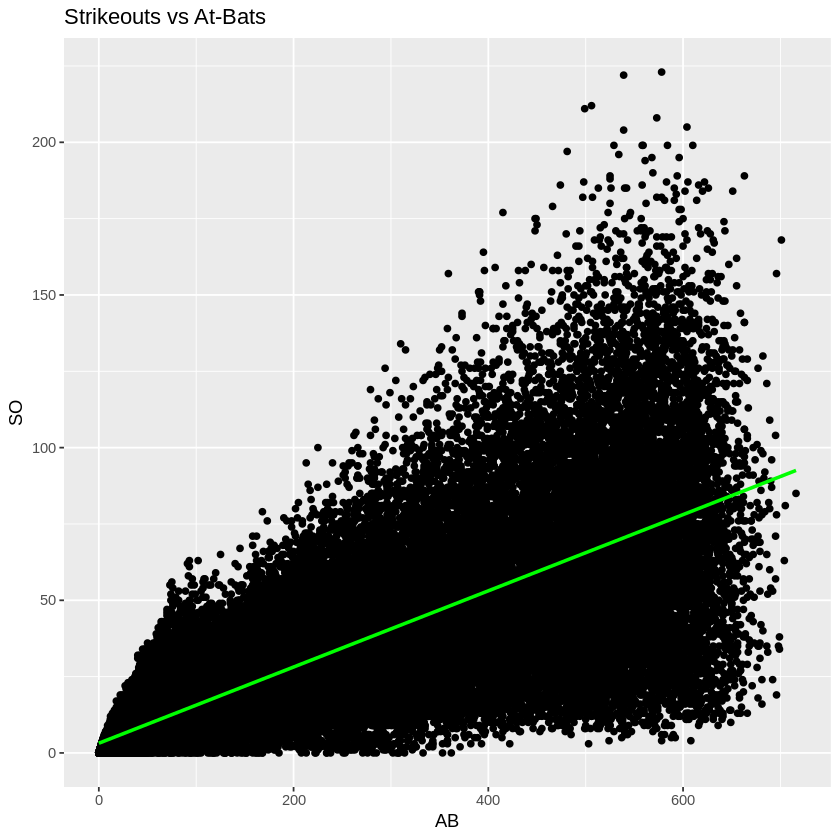

In [ ]:
lm_so_ab <- lm(SO ~ AB, data = batting_data)
summary(lm_so_ab)

ggplot(batting_data, aes(x = AB, y = SO)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color="green") +
  labs(title = "Strikeouts vs At-Bats")

The question that was asked here is whether the number of At-Bats has an effect on number of Strikeouts. From the above graph, we can see that the data points funnel out, which indicates a larger variance. This data is probably not best captured with a linear regression model (with an Adjusted $R^2$ value of `0.6709`). Regardless, it is easy to see there is a positive trend. If the lienar model was an accurate representation for the trend, we can interpret this as: For every one increase in At-Bats, the number of Strikeouts a batter will have will increase by `0.1247909`.

###   Strikeout Percentage and Walk Rate for Batters - compare later to pitchers


The purpose of this part is to determine if Walk Rate, or Walks (BB) in general, are related in any way to Strikeouts. This will be helpful for us to understand how Walks (BB) might affect a future model where we predict Strikeouts (SO). Note this part will also be useful for comparing Strikeout Percentage vs Walk Rate for Pitchers.


Call:
lm(formula = batting_data$strikeout_percentage ~ batting_data$walk_rate)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.765 -11.656  -4.657   5.856  75.235 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            24.765076   0.092198   268.6   <2e-16 ***
batting_data$walk_rate -0.511807   0.008778   -58.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.27 on 78838 degrees of freedom
  (22492 observations deleted due to missingness)
Multiple R-squared:  0.04134,	Adjusted R-squared:  0.04132 
F-statistic:  3399 on 1 and 78838 DF,  p-value: < 2.2e-16


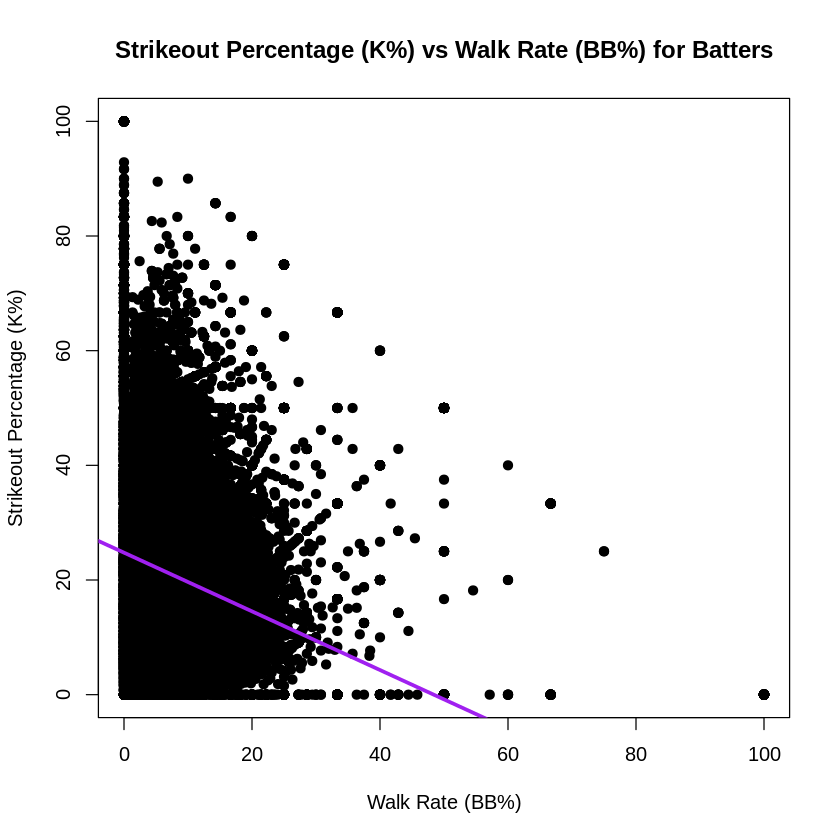

In [ ]:
# Walk Rate (BB%)
at_bats = batting_data$AB
walks = batting_data$BB
plate_appearances = at_bats + walks # estimate plate appearances

## NOTE ##
# We estimate plate_appearances with hit by pitch (HBP) and sacrifice flies (SF)
# but this data was unavailable

walk_rate = (walks / plate_appearances) * 100

# Strikeout Percentage (K%)
strikeouts = batting_data$SO

strikeout_percentage = (strikeouts / plate_appearances) * 100

# Add the new columns to the dataset
batting_data$walk_rate <- walk_rate
batting_data$strikeout_percentage <- strikeout_percentage

# Linear model
lm_so_bb_batters <- lm(batting_data$strikeout_percentage ~ batting_data$walk_rate)
summary(lm_so_bb_batters)

# K% vs BB%
plot(batting_data$walk_rate, batting_data$strikeout_percentage,
     main = "Strikeout Percentage (K%) vs Walk Rate (BB%) for Batters",
     xlab = "Walk Rate (BB%)",
     ylab = "Strikeout Percentage (K%)",
     pch = 19,
     col = "black")
abline(lm_so_bb_batters, col="purple", lwd=3)

From the above graph, there is clear indication of a negative trend. This is what we expected because intuitively, a higher strikeout percentage is associated with a lower walk rate. In other words, the more a batter strikes out, the less opportunities a batter has to achieve a walk. This is logical because usually batters that strike out more become more picky and selective at the plate when they hit. It is important to note here that correlation does not imply causation. So in our example here, it does not mean that when a batter strikes out it causes them to get less walks. There are other confounding variables to consider here. A good example is that At-Bats can result in a hit, which is neither a strikeout or a walk.

### Predicting Strikeouts by a Batter

First, we tried fitting a linear model with only a few predictors. We checked the linear regression assumptions below. Then after looking into the model metrics (AIC, BIC, and Adjusted $R^2$), there seemed to be much room for improvement. So, in the following code, we tried to use RegSubsets to then select the best model with the lowest RSS. We also examine the AIC, BIC, and Adjusted $R^2$ metrics.


Call:
lm(formula = SO ~ AB + HR + BB, data = batting_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-107.600   -4.331   -2.590    4.255  125.922 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.303010   0.060572   71.04  < 2e-16 ***
AB          0.077345   0.000528  146.48  < 2e-16 ***
HR          1.777538   0.010872  163.49  < 2e-16 ***
BB          0.022158   0.004817    4.60 4.23e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.03 on 88341 degrees of freedom
  (12987 observations deleted due to missingness)
Multiple R-squared:  0.7565,	Adjusted R-squared:  0.7565 
F-statistic: 9.15e+04 on 3 and 88341 DF,  p-value: < 2.2e-16


AIC: 717390.1 
BIC: 717437.1 
Adjusted R-squared: 0.7565197 


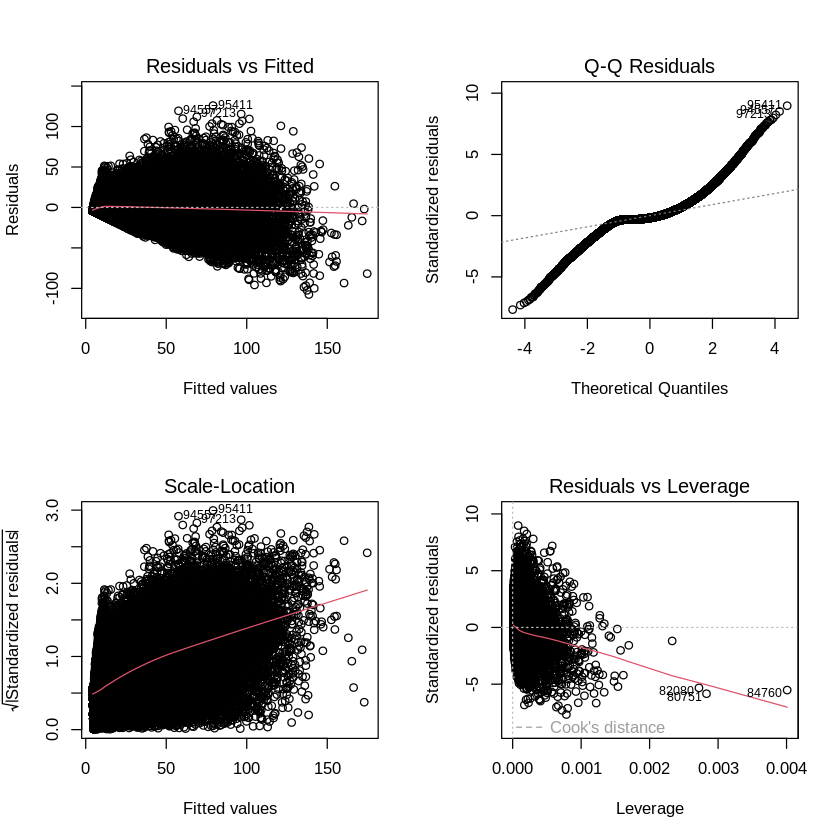

In [ ]:
# Linear model with a few predictors (At-Bats, Homeruns, Walks)
batting_lm <- lm(SO ~ AB + HR + BB, data = batting_data)
summary(batting_lm)

# # Calculate model metrics - AIC, BIC, Adjusted R^2, MSPE (mean squared prediction error)
aic_value <- AIC(batting_lm)
bic_value <- BIC(batting_lm)
adj_r_squared <- summary(batting_lm)$adj.r.squared

# Display the results
cat("AIC:", aic_value, "\n")
cat("BIC:", bic_value, "\n")
cat("Adjusted R-squared:", adj_r_squared, "\n")

# Plot Residuals vs Fitted, QQ Residuals, Scale-Location, and Residuals vs Leverage
par(mfrow = c(2,2))
plot(batting_lm)


Call:
lm(formula = log_SO ~ AB + HR + BB, data = batting_data_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1805 -0.5591  0.1069  0.6716  2.0921 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.605e+00  4.382e-03  366.32   <2e-16 ***
AB          4.774e-03  3.321e-05  143.78   <2e-16 ***
HR          2.110e-02  6.671e-04   31.63   <2e-16 ***
BB          5.877e-04  2.954e-04    1.99   0.0466 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8595 on 72973 degrees of freedom
Multiple R-squared:  0.593,	Adjusted R-squared:  0.593 
F-statistic: 3.545e+04 on 3 and 72973 DF,  p-value: < 2.2e-16


AIC: 185014.6 
BIC: 185060.6 
Adjusted R-squared: 0.5930151 


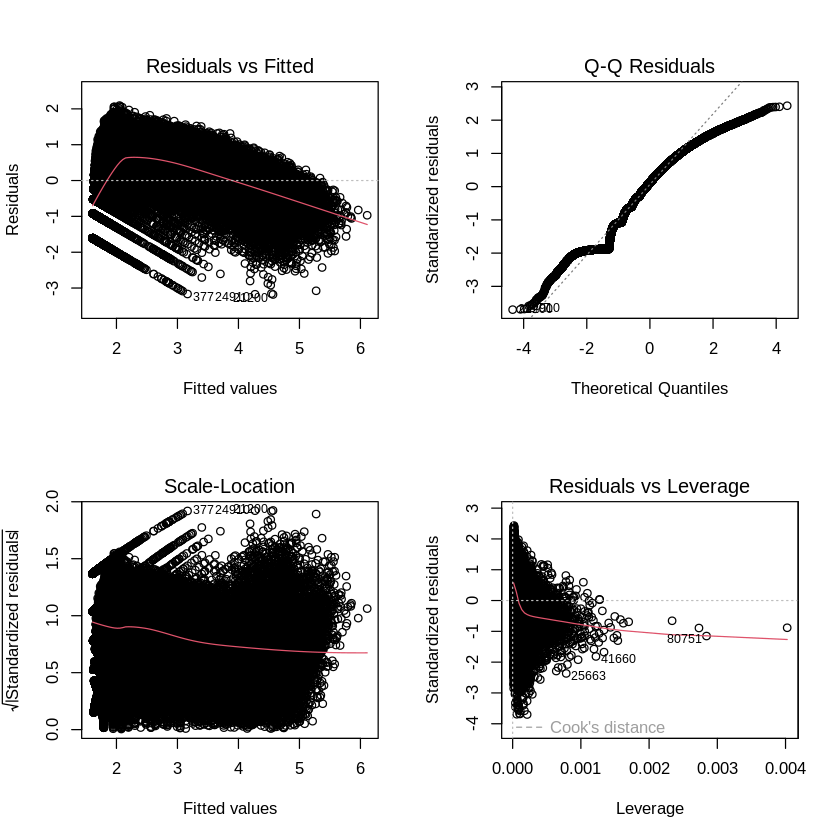

In [ ]:
# Try a log transformation of response
batting_data$log_SO <- log(batting_data$SO)
# Remove rows with NA or Inf values in log_SO
batting_data_clean <- batting_data[!is.na(batting_data$log_SO) & !is.infinite(batting_data$log_SO), ]
# Fit the linear model after cleaning
log_batting_lm <- lm(log_SO ~ AB + HR + BB, data = batting_data_clean)
summary(log_batting_lm)

# Calculate model metrics - AIC, BIC, Adjusted R^2, MSPE (mean squared prediction error)
aic_value <- AIC(log_batting_lm)
bic_value <- BIC(log_batting_lm)
adj_r_squared <- summary(log_batting_lm)$adj.r.squared

# Display the results
cat("AIC:", aic_value, "\n")
cat("BIC:", bic_value, "\n")
cat("Adjusted R-squared:", adj_r_squared, "\n")

# Plot Residuals vs Fitted, QQ Residuals, Scale-Location, and Residuals vs Leverage
par(mfrow = c(2,2))
plot(log_batting_lm)


Call:
lm(formula = log_SO ~ log_AB + log_HR + log_BB, data = batting_data_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3009 -0.2692  0.0697  0.3475  1.5866 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.289266   0.022945  12.607   <2e-16 ***
log_AB      0.488084   0.006249  78.111   <2e-16 ***
log_HR      0.268902   0.003302  81.429   <2e-16 ***
log_BB      0.045104   0.005027   8.973   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5084 on 36038 degrees of freedom
Multiple R-squared:  0.6504,	Adjusted R-squared:  0.6504 
F-statistic: 2.235e+04 on 3 and 36038 DF,  p-value: < 2.2e-16


AIC: 53521.33 
BIC: 53563.79 
Adjusted R-squared: 0.650355 


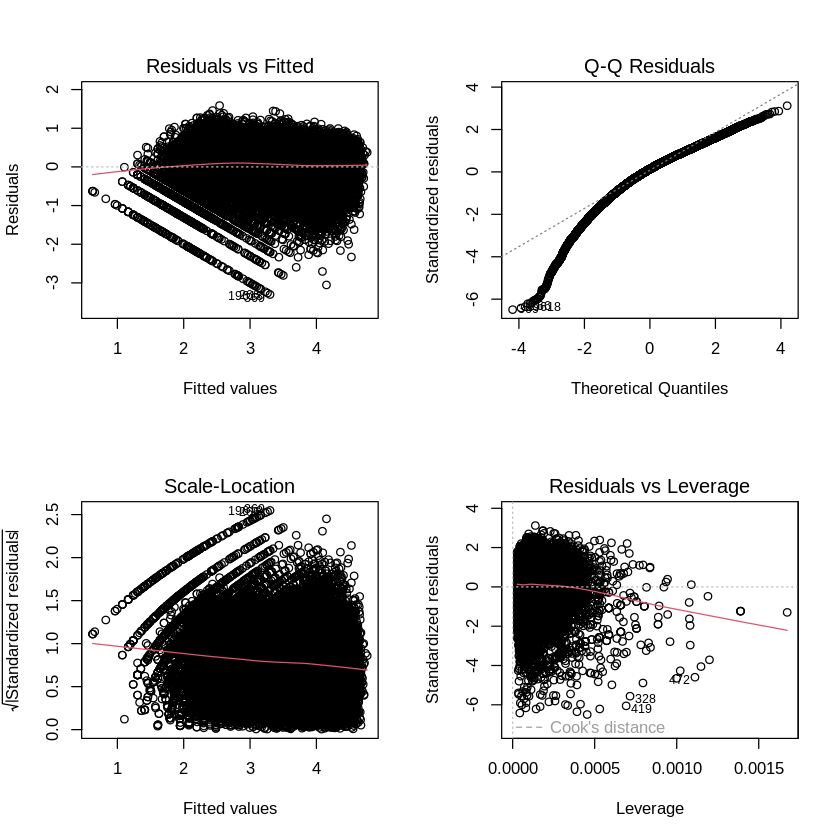

In [ ]:
# Try log transformation of response and predictors
batting_data$log_SO <- log(batting_data$SO)
batting_data$log_AB <- log(batting_data$AB)
batting_data$log_HR <- log(batting_data$HR)
batting_data$log_BB <- log(batting_data$BB)
# Remove rows with NA or Inf in any of the transformed columns
batting_data_clean <- batting_data[!is.na(batting_data$log_SO) & !is.infinite(batting_data$log_SO) &
                                    !is.na(batting_data$log_AB) & !is.infinite(batting_data$log_AB) &
                                    !is.na(batting_data$log_HR) & !is.infinite(batting_data$log_HR) &
                                    !is.na(batting_data$log_BB) & !is.infinite(batting_data$log_BB), ]
# Fit the linear model after cleaning
logAll_batting_lm <- lm(log_SO ~ log_AB + log_HR + log_BB, data = batting_data_clean)
summary(logAll_batting_lm)

# Calculate model metrics - AIC, BIC, Adjusted R^2, MSPE (mean squared prediction error)
aic_value <- AIC(logAll_batting_lm)
bic_value <- BIC(logAll_batting_lm)
adj_r_squared <- summary(logAll_batting_lm)$adj.r.squared

# Display the results
cat("AIC:", aic_value, "\n")
cat("BIC:", bic_value, "\n")
cat("Adjusted R-squared:", adj_r_squared, "\n")

# Plot Residuals vs Fitted, QQ Residuals, Scale-Location, and Residuals vs Leverage
par(mfrow = c(2,2))
plot(logAll_batting_lm)

The first Residuals vs Fitted plot shows a funnel shape, which indicates heterscedasticity, a violation of the non-constant variance assumption. To remedy this, we tried to log transform the response variable, but that lowered Adjusted $R^2$ by `0.1635` and also increased both `AIC` and `BIC` by a significant amount. So instead, we then tried to transform both the response and predictors. This only lowered Adjusted $R^2$ by `0.1061` from the original model, but then significantly lowered `AIC` by `663,868.77` and `BIC` by `663,873.31`. Both of the metrics improved here, with the sacrifice of a slightly lower Adjusted $R^2$.

After looking into the assumptions, we continued to try and fit a higher dimensional model, and evaluate which predictors are signifcant based on the 3 metrics: `AIC`, `BIC`, and Adjusted $R^2$. Below, we used regsubsets to develop models with different combinations of predictors, and determine models with the lowest RSS (residual sum of squares).

[1] 10

[1] 10

[1] 8

Warning message in model.matrix.default(mt, mf, contrasts):
“the response appeared on the right-hand side and was dropped”
Warning message in model.matrix.default(mt, mf, contrasts):
“problem with term 1 in model.matrix: no columns are assigned”
Warning message in model.matrix.default(mt, mf, contrasts):
“the response appeared on the right-hand side and was dropped”
Warning message in model.matrix.default(mt, mf, contrasts):
“problem with term 1 in model.matrix: no columns are assigned”
Warning message in model.matrix.default(mt, mf, contrasts):
“the response appeared on the right-hand side and was dropped”
Warning message in model.matrix.default(mt, mf, contrasts):
“problem with term 1 in model.matrix: no columns are assigned”
Warning message in model.matrix.default(mt, mf, contrasts):
“the response appeared on the right-hand side and was dropped”
Warning message in model.matrix.default(mt, mf, contrasts):
“problem with term 1 in model.matrix: no columns are assigned”
Warning message 

Predictors,AIC,BIC,Adj_R2
<chr>,<dbl>,<dbl>,<dbl>
"SO, AB",744007.9,744036.1,0.6709030
"SO, AB, HR",717409.3,717446.8,0.7564642
"SO, AB, HR, H",690856.0,690903.0,0.8196878
"SO, AB, HR, X2B, H",688275.4,688331.7,0.8248806
"SO, AB, HR, X2B, H, GIDP",545449.3,545513.4,0.8492198
"SO, AB, HR, X2B, RBI, H, GIDP",544697.2,544770.5,0.8508326
"SO, AB, G, HR, X2B, RBI, H, GIDP",544564.4,544646.8,0.8511175
"SO, AB, G, BB, HR, X2B, RBI, H, GIDP",544539.9,544631.4,0.8511716
"SO, AB, G, BB, HR, X2B, X3B, RBI, H, GIDP",544532.5,544633.2,0.8511894


[1] 544523

,Predictors,AIC,BIC,Adj_R2
,<chr>,<dbl>,<dbl>,<dbl>
10,"SO, AB, G, BB, HR, R, X2B, X3B, RBI, H, GIDP",544523,544632.9,0.8512118


[1] 544631.4

,Predictors,AIC,BIC,Adj_R2
,<chr>,<dbl>,<dbl>,<dbl>
8,"SO, AB, G, BB, HR, X2B, RBI, H, GIDP",544539.9,544631.4,0.8511716


[1] 0.8512118

,Predictors,AIC,BIC,Adj_R2
,<chr>,<dbl>,<dbl>,<dbl>
10,"SO, AB, G, BB, HR, R, X2B, X3B, RBI, H, GIDP",544523,544632.9,0.8512118


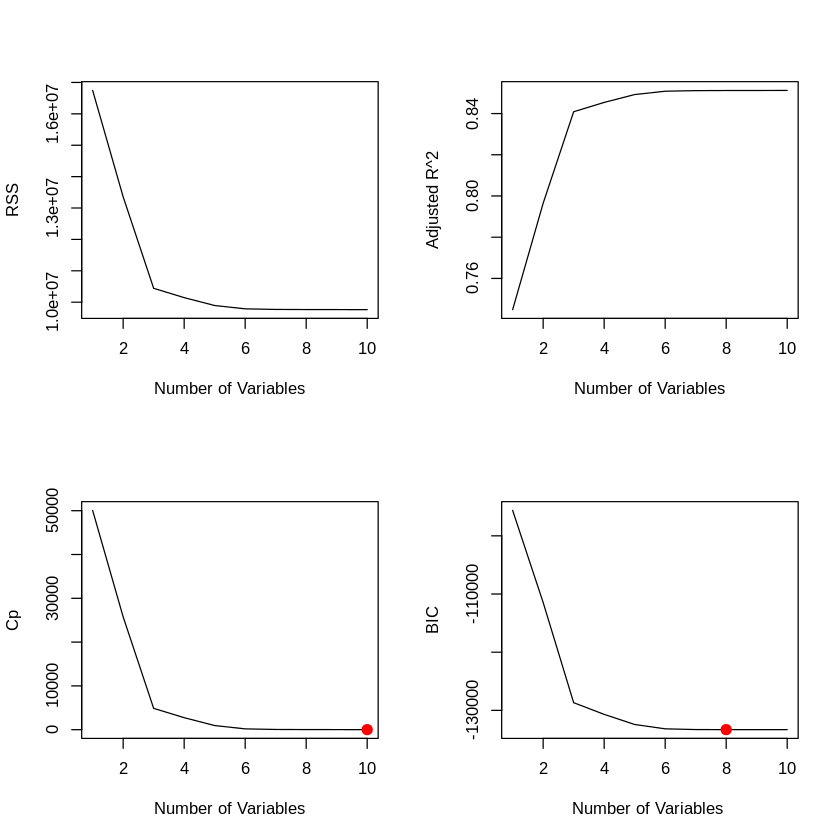

In [ ]:
# Predicting Number of Strikeouts a Batter Might Have in a Season

# Define relevant predictors
predictors <- c("AB", "G", "BB", "HR", "R", "X2B", "X3B", "RBI", "H", "GIDP")
# At-Bats, Games Played, Walks, Homeruns, Runs Scored, Double, Triples, Runs Batted In,
# Hits, Grounded into Double Play

# Filter dataset to include only relevant predictors and response variable
batting_data_filtered <- batting_data[, c("SO", predictors)]

# Perform all subset selection
all_models <- regsubsets(SO ~ ., data = batting_data_filtered, nvmax = length(predictors)) # from leaps library

# Extract model summaries
summary_all <- summary(all_models)

# Visualize regsubsets summary metrics
par(mfrow = c(2, 2))
# Plot RSS
plot(summary_all$rss ,xlab = "Number of Variables", ylab = "RSS", type = "l")
# Plot Adjusted R^2
plot(summary_all$adjr2 ,xlab = "Number of Variables", ylab = "Adjusted R^2", type = "l")
points(11, summary_all$adjr2[11], col = "red", cex = 2, pch = 20)
# Plot Mallow's CP, balance of model fit and complexity, want small & close to num. of predictors
plot(summary_all$cp, xlab = "Number of Variables", ylab = "Cp", type = "l")
points(which.min(summary_all$cp), summary_all$cp[which.min(summary_all$cp)],
        col = "red", cex = 2, pch = 20)
# Plot BIC
plot(summary_all$bic, xlab = "Number of Variables ", ylab = "BIC", type = "l")
points(which.min(summary_all$bic), summary_all$bic[which.min(summary_all$bic)],
       col = "red", cex = 2, pch = 20)

# Determine max and mins relative to each metric
which.max(summary_all$adjr2) # model 10
which.min(summary_all$cp) # model 10
which.min(summary_all$bic) # model 8

# Initialize results dataframe
model_results <- data.frame(
  Predictors = character(),
  AIC = numeric(),
  BIC = numeric(),
  Adj_R2 = numeric(),
  stringsAsFactors = FALSE
)

# Loop through models to compute metrics
for (i in 1:nrow(summary_all$which)) {
  # Get selected predictors
  selected_predictors <- names(batting_data_filtered)[summary_all$which[i, ]]

  # Create formula
  formula <- as.formula(paste("SO ~", paste(selected_predictors, collapse = " + ")))

  # Fit the model
  model <- lm(formula, data = batting_data_filtered)

  # Compute metrics
  aic_value <- AIC(model)
  bic_value <- BIC(model)
  adj_r_squared <- summary(model)$adj.r.squared

  # Save results
  model_results <- rbind(
    model_results,
    data.frame(
      Predictors = paste(selected_predictors, collapse = ", "),
      AIC = aic_value,
      BIC = bic_value,
      Adj_R2 = adj_r_squared
    )
  )
}

# Display model results
model_results

# Display the best model for each metric
min_aic <- min(model_results$AIC)
min_aic_model <- model_results[model_results$AIC == min_aic, ]
min_aic
min_aic_model

min_bic <- min(model_results$BIC)
min_bic_model <- model_results[model_results$BIC == min_bic, ]
min_bic
min_bic_model

max_adj_r2 <- max(model_results$Adj_R2)
max_adj_r2_model <- model_results[model_results$Adj_R2 == max_adj_r2, ]
max_adj_r2
max_adj_r2_model

From the above results, the best model according to `AIC` and Adjusted $R^2$ is model 10, which contains all 10 predictors:

1. At-Bats
2. Games Played
3. Walks
4. Homeruns
5. Runs Scored
6. Doubles
7. Triples
8. Runs Batted In
9. Hits
10. Grounded into Double Play

This model had both the lowest `AIC` value and highest Adjusted $R^2$ value.

However, the best model according to `BIC` is model 8, which contains the following predictors:

1. At-Bats
2. Games Played
3. Walks
4. Homeruns
5. Doubles
6. Runs Batted In
7. Hits
8. Grounded into Double Play

This model had the lowest `BIC` of the models that were produced using the regsubsets library.

# 2. Pitching

### Strikeout Percentage and Walk Rate: Evaluate basic pitching metrics

We want to calculate strikeout percentage and walk rate and find out if there is any relationship between these simple pitching metrics.

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,⋯,HBP,BK,BFP,GF,R,SH,SF,GIDP,walk_rate,strikeout_percentage
,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
42585,abadfe01,2014,1,OAK,AL,2,4,69,0,0,⋯,4,0,216,17,11,1,2,6,6.944444,23.61111
42586,aceveal01,2014,1,NYA,AL,1,2,10,0,0,⋯,1,1,85,5,14,0,0,1,4.705882,18.82353
42587,achteaj01,2014,1,MIN,AL,1,0,7,0,0,⋯,0,0,49,1,7,0,0,0,6.122449,10.20408
42588,adamsau01,2014,1,CLE,AL,0,0,6,0,0,⋯,0,0,30,1,7,0,0,1,3.333333,13.33333
42589,adamsmi03,2014,1,PHI,NL,2,1,22,0,0,⋯,0,0,79,0,8,2,0,2,10.126582,26.58228



Call:
lm(formula = pitching_data_clean1$strikeout_percentage ~ pitching_data_clean1$walk_rate)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.772  -4.321  -0.421   4.228  33.464 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    20.77155    0.51324  40.471  < 2e-16 ***
pitching_data_clean1$walk_rate -0.14818    0.04917  -3.014  0.00267 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.491 on 740 degrees of freedom
Multiple R-squared:  0.01212,	Adjusted R-squared:  0.01079 
F-statistic: 9.082 on 1 and 740 DF,  p-value: 0.00267


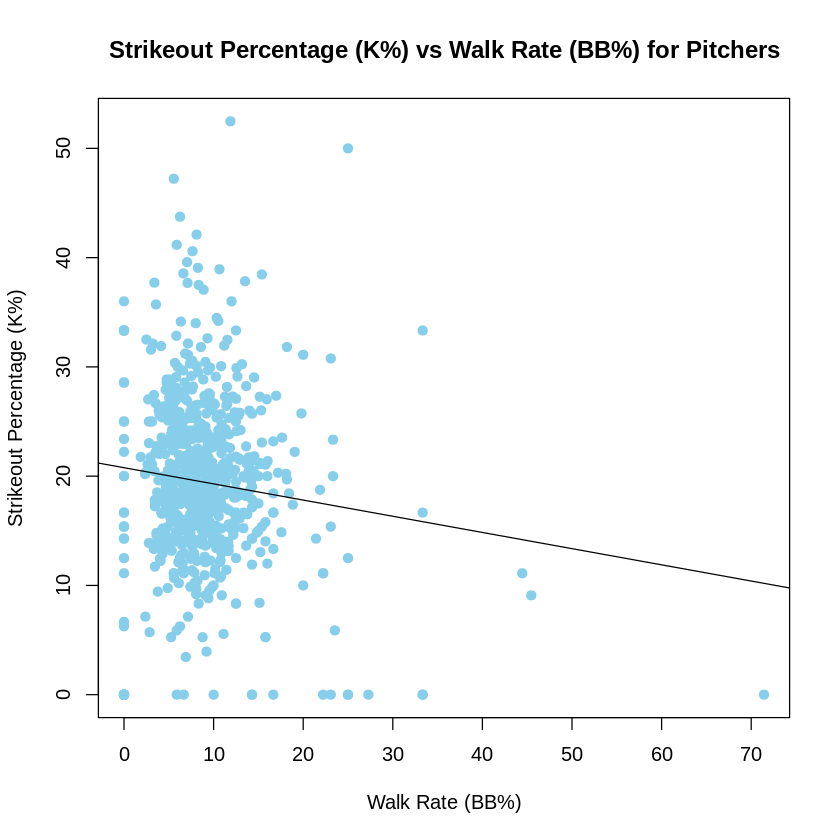

In [ ]:
# Pitching: Strikeout Percentage and Walk Rate, ERA

# Necessary data
innings_pitched = pitching_data$IPouts / 3 # Convert outs to innings, outs pitched = innings*3
batters_faced = pitching_data$BFP # Batters faced
walks_allowed = pitching_data$BB # Walks Allowed
strikeouts = pitching_data$SO # Strikeouts by a Pitcher

# Walk Rate (BB%)
walk_rate = ifelse(batters_faced > 0, (walks_allowed / batters_faced) * 100, NA)

# Strikeout Percentage (SO%)
strikeout_percentage = ifelse(batters_faced > 0, (strikeouts / batters_faced) * 100, NA)

# Add columns to the dataset
pitching_data$walk_rate <- walk_rate
pitching_data$strikeout_percentage <- strikeout_percentage

# Remove rows with NA or problematic values (NA, inf, or -inf)
pitching_data_clean1 <- na.omit(pitching_data) # Remove rows with NA
pitching_data_clean1 <- pitching_data_clean1[is.finite(pitching_data_clean1$walk_rate) &
                                         is.finite(pitching_data_clean1$strikeout_percentage), ]
# View cleaned data
head(pitching_data_clean1, 5)

# K% vs BB% Plot
plot(pitching_data_clean1$walk_rate, pitching_data_clean1$strikeout_percentage,
     main = "Strikeout Percentage (K%) vs Walk Rate (BB%) for Pitchers",
     xlab = "Walk Rate (BB%)",
     ylab = "Strikeout Percentage (K%)",
     pch = 19,
     col = "skyblue")

lm_so_bb_pitchers <- lm(pitching_data_clean1$strikeout_percentage ~ pitching_data_clean1$walk_rate)
abline(lm_so_bb_pitchers)

summary(lm_so_bb_pitchers)


First, we note that there are a significantly smaller number of data points on the graph. This is because when calculating the percentages, we had to ensure that the denominators were not missing values (`NA` or `inf`). To expand on this, we calculated `Walk Rate` by dividing walks allowed by a pitcher by the number of batters the pitcher has faced. If the number of batters faced is not greater than zero (meaning it is either zero or a missing value `NA`), then the resulting value for percentage becomes `NA`. We clean the data set to omit the rows with `NA` values. Similarly, we repeat the process for `Strikeout Percentage`.

After cleaning the data, we graphed `Strikeout Percentage (K%)` against `Walk Rate (BB%)` which is shown above. We see that there is a cluster of points, which is probably not best represented using a linear model since the Adjusted $R^2$ of the model is very low (`0.01079`). A non-linear model would most likely be more sufficient since the linear model here only captures 1% of the variance in the data (after cleaning). In general though, we observe that most data points are clustered with a `Walk Rate` between 0% and 20%, ranging mostly within a `Strikeout Rate` between 10% and 30%. It is hard to say here that there is any correlation between `Walk Rate` and `Strikeout Rate`.

### Strikeout to Walk Ratio Relative to Runs Allowed: Evaluate overall pitcher performance

Using the above section, we create a new column for the Strikeout-to-Walk-Ratio in order to evaluate the performance of pitchers relative to the number of runs a pitcher allows.

In [ ]:
# Create Strikeout-to-Walk Ratio Column (using above section)
pitching_data$K_BB_ratio <- pitching_data$SO / pitching_data$BB

In [ ]:
# Check counts
sum(is.na(pitching_data$K_BB_ratio)) # Count of NAs in K_BB_ratio
sum(is.na(pitching_data$R)) # Count of NAs in R
sum(is.infinite(pitching_data$K_BB_ratio)) # Count of Inf in K_BB_ratio

# Clean data where BB is zero (results in inf)
pitching_data$K_BB_ratio[is.infinite(pitching_data$K_BB_ratio)] <- NA
# Remove rows with missing or invalid values
pitching_data_clean2 <- na.omit(pitching_data[, c("K_BB_ratio", "R")])
head(pitching_data_clean2)

# Re-check counts
sum(is.na(pitching_data_clean2$K_BB_ratio)) # Count of NAs in K_BB_ratio
sum(is.na(pitching_data_clean2$R)) # Count of NAs in R
sum(is.infinite(pitching_data_clean2$K_BB_ratio)) # Count of Inf in K_BB_ratio

[1] 505

[1] 0

[1] 638

,K_BB_ratio,R
,<dbl>,<int>
1,0.09090909,42
2,0.35135135,292
4,0.48387097,257
5,0.00000000,21
7,0.33333333,30
8,0.80952381,243


[1] 0

[1] 0

[1] 0


Call:
lm(formula = R ~ K_BB_ratio, data = pitching_data_clean2)

Residuals:
   Min     1Q Median     3Q    Max 
-66.23 -32.42 -14.87  25.06 476.25 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  42.2356     0.3504 120.523  < 2e-16 ***
K_BB_ratio    1.3805     0.1774   7.781 7.38e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 43.45 on 42994 degrees of freedom
Multiple R-squared:  0.001406,	Adjusted R-squared:  0.001383 
F-statistic: 60.54 on 1 and 42994 DF,  p-value: 7.376e-15


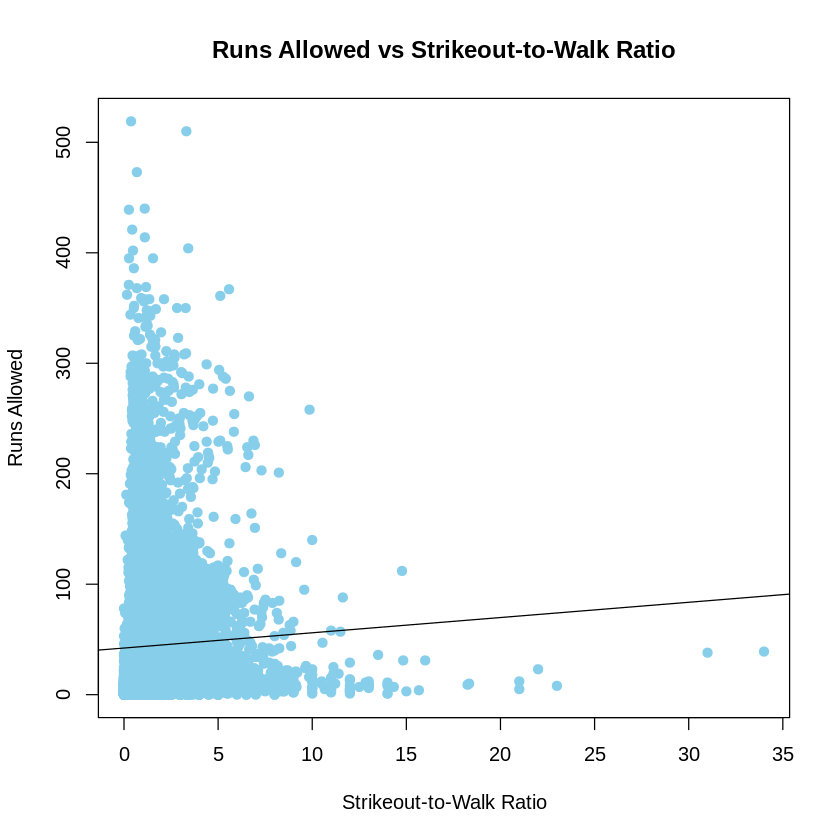

In [ ]:
# Pitching: Strikeout-to-Walk Ratio

# Strikeout-to-Walk Ratio
lm_k_bb <- lm(R ~ K_BB_ratio, data = pitching_data_clean2)
summary(lm_k_bb)

plot(pitching_data_clean2$K_BB_ratio, pitching_data_clean2$R,
     main = "Runs Allowed vs Strikeout-to-Walk Ratio",
     xlab = "Strikeout-to-Walk Ratio",
     ylab = "Runs Allowed",
     pch = 19,
     col = "skyblue")
abline(lm_k_bb)

Similary, we cleaned the data to correctly calculate the `Strikeout-to-Walk Ratio` so there are not as many data points as in the original pitching dataset.Then we are able to graph `Runs Allowed` against `Strikeout-to-Walk Ratio`. We expected for a higher `Strikeout-to-Walk Ratio` to result in a lower number of `Runs Allowed`. We can see some data points that do follow this intuition. Much of the data is concentrated within a `Strikeout-to-Walk Ratio` of 0 and 5, where there are higher numbers of `Runs Allowed`. This follows the inverse of our expectation. More people allowed on base means a higher chance for base runners to score a run.

It is clear a linear model does not fit. A model that would best fit the data is probably an inverse exponential function, or an exponential decay.

###   Runs Allowed vs Walks: Does limiting number of walks decrease runs allowed?

We can confirm that the above graph makes sense by looking at the relationship between Runs Allowed (R) and Walks Allowed (BB) by pitchers.


Call:
lm(formula = R ~ BB, data = pitching_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-158.84   -8.83   -3.16    4.76  462.86 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.266236   0.161685   26.39   <2e-16 ***
BB          1.296938   0.003913  331.47   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.25 on 44137 degrees of freedom
Multiple R-squared:  0.7134,	Adjusted R-squared:  0.7134 
F-statistic: 1.099e+05 on 1 and 44137 DF,  p-value: < 2.2e-16


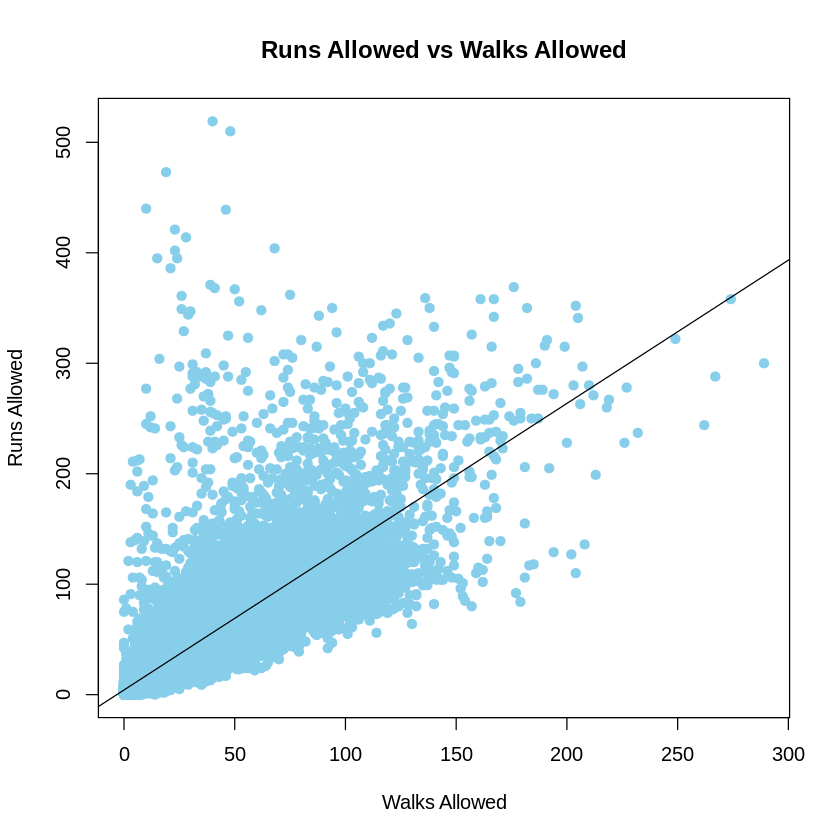

In [ ]:
# Pitching: Runs allowed vs Walks
lm_runs_walks <- lm(R ~ BB, data = pitching_data)
summary(lm_runs_walks)

# Plot graph (R vs BB)
plot(pitching_data$BB, pitching_data$R,
     main = "Runs Allowed vs Walks Allowed",
     xlab = "Walks Allowed",
     ylab = "Runs Allowed",
     pch = 19,
     col = "skyblue")
abline(lm_runs_walks)

We can see that the linear model: `Runs Allowed`$= 4.266236 + 1.296938$ *`Walks Allowed` captures the positive linear trend pretty well, with an Adjusted $R^2$ value of `0.7134`, which means about 71% of the variation is captured by the linear model. So it is reasonable to say that number of `Walks Allowed` increases the number of `Runs Allowed` by a pitcher. This makes sense why pitchers want to avoid walking batters.

### Predicting Strikeouts by a Pitcher

Since walks and strikeout are so vital to the performance of a pitcher (as seen from the previous sections), we decided to try and predict the number of strikeouts by a pitcher. If we can determine the number of strikeouts by a pitcher, it is likely this pitcher is really good, and could maybe be associated with a higher salary.

[1] 9

[1] 9

[1] 9

Warning message in model.matrix.default(mt, mf, contrasts):
“the response appeared on the right-hand side and was dropped”
Warning message in model.matrix.default(mt, mf, contrasts):
“problem with term 1 in model.matrix: no columns are assigned”
Warning message in model.matrix.default(mt, mf, contrasts):
“the response appeared on the right-hand side and was dropped”
Warning message in model.matrix.default(mt, mf, contrasts):
“problem with term 1 in model.matrix: no columns are assigned”
Warning message in model.matrix.default(mt, mf, contrasts):
“the response appeared on the right-hand side and was dropped”
Warning message in model.matrix.default(mt, mf, contrasts):
“problem with term 1 in model.matrix: no columns are assigned”
Warning message in model.matrix.default(mt, mf, contrasts):
“the response appeared on the right-hand side and was dropped”
Warning message in model.matrix.default(mt, mf, contrasts):
“problem with term 1 in model.matrix: no columns are assigned”
Warning message 

Predictors,AIC,BIC,Adj_R2
<chr>,<dbl>,<dbl>,<dbl>
"SO, IPouts",413059.8,413085.9,0.7209725
"SO, IPouts, CG",399817.3,399852.1,0.7933012
"SO, IPouts, CG, SHO",398377.6,398421.0,0.7999392
"SO, G, IPouts, CG, SHO",397831.0,397883.2,0.8024057
"SO, G, IPouts, HR, CG, SHO",397068.6,397129.5,0.8057939
"SO, G, GS, IPouts, HR, CG, SHO",396742.4,396811.9,0.8072284
"SO, G, GS, IPouts, HR, BB, CG, SHO",396541.5,396619.7,0.8081082
"SO, G, GS, IPouts, ERA, HR, BB, CG, SHO",395814.0,395901.0,0.8078407
"SO, G, GS, IPouts, ERA, BAOpp, HR, BB, CG, SHO",379345.8,379441.0,0.8149431


[1] 379271.9

,Predictors,AIC,BIC,Adj_R2
,<chr>,<dbl>,<dbl>,<dbl>
10,"SO, G, GS, IPouts, BFP, ERA, BAOpp, HR, BB, CG, SHO",379271.9,379375.8,0.814935


[1] 379375.8

,Predictors,AIC,BIC,Adj_R2
,<chr>,<dbl>,<dbl>,<dbl>
10,"SO, G, GS, IPouts, BFP, ERA, BAOpp, HR, BB, CG, SHO",379271.9,379375.8,0.814935


[1] 0.8149431

,Predictors,AIC,BIC,Adj_R2
,<chr>,<dbl>,<dbl>,<dbl>
9,"SO, G, GS, IPouts, ERA, BAOpp, HR, BB, CG, SHO",379345.8,379441,0.8149431


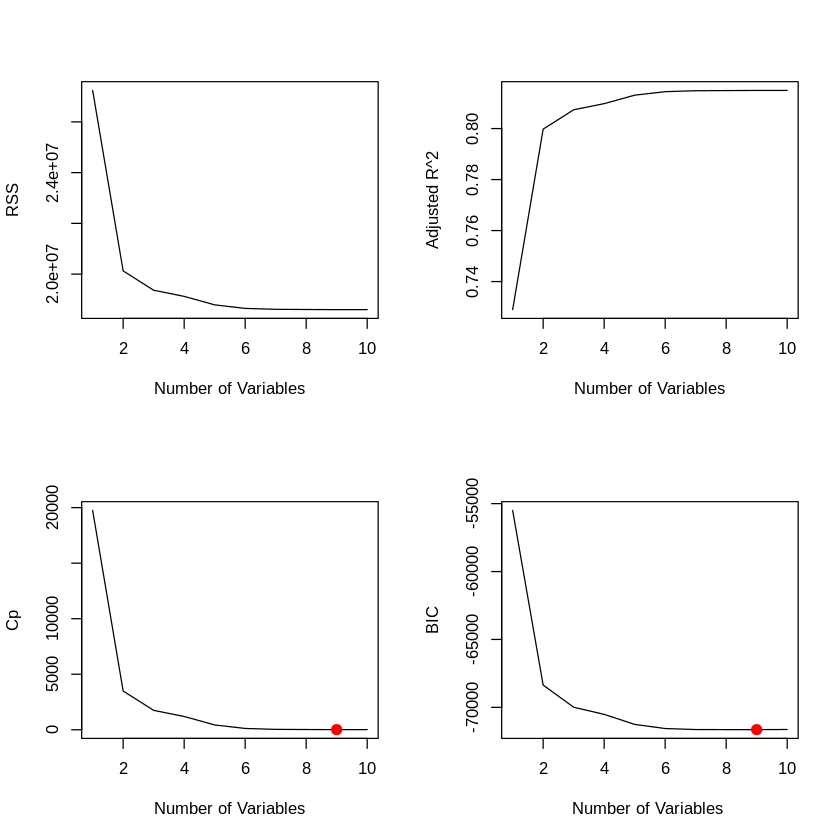

In [ ]:
# Predicting Number of Strikeouts a Pitcher Might Have in a Season

# Define relevant predictors
predictors <- c("G", "GS", "IPouts", "BFP", "ERA", "BAOpp", "HR", "BB", "CG", "SHO")
# Games Played, Games Started, Outs Pitched, Batters Faced by Pitcher, Earned Run Average,
# Batting Average Against, Homeruns Allowed, Walks Allowed, Complete Games, Shutouts

# Filter dataset to include only relevant predictors and response variable
pitching_data_filtered <- pitching_data[, c("SO", predictors)]

# Perform all subset selection
all_models <- regsubsets(SO ~ ., data = pitching_data_filtered, nvmax = length(predictors)) # from leaps library

# Extract model summaries
summary_all <- summary(all_models)

# Visualize regsubsets summary metrics
par(mfrow = c(2, 2))
# Plot RSS
plot(summary_all$rss ,xlab = "Number of Variables", ylab = "RSS", type = "l")
# Plot Adjusted R^2
plot(summary_all$adjr2 ,xlab = "Number of Variables", ylab = "Adjusted R^2", type = "l")
points(11, summary_all$adjr2[11], col = "red", cex = 2, pch = 20)
# Plot Mallow's CP, balance of model fit and complexity, want small & close to num. of predictors
plot(summary_all$cp, xlab = "Number of Variables", ylab = "Cp", type = "l")
points (which.min(summary_all$cp), summary_all$cp[which.min(summary_all$cp)],
        col = "red", cex = 2, pch = 20)
# Plot BIC
plot(summary_all$bic, xlab = "Number of Variables ", ylab = "BIC", type = "l")
points(which.min(summary_all$bic), summary_all$bic[which.min(summary_all$bic)],
       col = "red", cex = 2, pch = 20)

# Determine max and mins relative to each metric
which.max(summary_all$adjr2) # model 9
which.min(summary_all$cp) # model 9
which.min(summary_all$bic) # model 9

# Initialize results dataframe
model_results <- data.frame(
  Predictors = character(),
  AIC = numeric(),
  BIC = numeric(),
  Adj_R2 = numeric(),
  stringsAsFactors = FALSE
)

# Loop through models to compute metrics
for (i in 1:nrow(summary_all$which)) {
  # Get selected predictors
  selected_predictors <- names(pitching_data_filtered)[summary_all$which[i, ]]

  # Create formula
  formula <- as.formula(paste("SO ~", paste(selected_predictors, collapse = " + ")))

  # Fit the model
  model <- lm(formula, data = pitching_data_filtered)

  # Compute metrics
  aic_value <- AIC(model)
  bic_value <- BIC(model)
  adj_r_squared <- summary(model)$adj.r.squared

  # Save results
  model_results <- rbind(
    model_results,
    data.frame(
      Predictors = paste(selected_predictors, collapse = ", "),
      AIC = aic_value,
      BIC = bic_value,
      Adj_R2 = adj_r_squared
    )
  )
}

# Display model results
model_results

# Display the best model for each metric
min_aic <- min(model_results$AIC)
min_aic_model <- model_results[model_results$AIC == min_aic, ]
min_aic
min_aic_model

min_bic <- min(model_results$BIC)
min_bic_model <- model_results[model_results$BIC == min_bic, ]
min_bic
min_bic_model

max_adj_r2 <- max(model_results$Adj_R2)
max_adj_r2_model <- model_results[model_results$Adj_R2 == max_adj_r2, ]
max_adj_r2
max_adj_r2_model

From the above results, the best model according to `AIC` and `BIC` is model 10, which contains all 10 predictors:

1. Games Played
2. Games Started
3. Outs Pitched
4. Batters Faced by Pitcher
5. Earned Run Average
6. Batting Average Against
7. Homeruns Allowed
8. Walks Allowed
9. Complete Games
10. Shutouts

This model had both the lowest `AIC` value and lowest `BIC` value.

However, the best model according to Mallows Cp and Adjusted $R^2$ is model 9, which contains the following predictors:

1. Games Played
2. Games Started
3. Outs Pitched
4. Earned Run Average
5. Batting Average Against
6. Homeruns Allowed
7. Walks Allowed
8. Complete Games
9. Shutouts

This model had the highest Adjusted $R^2$  of the models that were produced using the regsubsets library. (Note: Mallows Cp is a balance of model fit and complexity, and we want small & close to the number of predictors)

###   Strikeouts vs ERA plot: Visualize relationship between important pitching metrics.

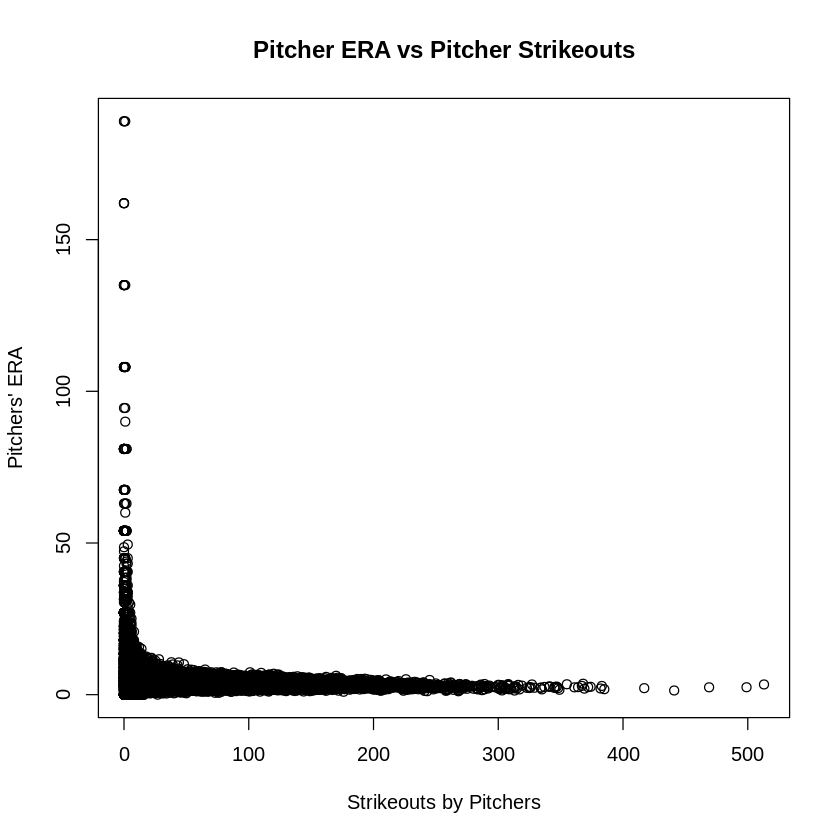

In [ ]:
# Pitching: Strikeouts vs ERA plot
plot(pitching_data$SO, pitching_data$ERA,
     xlab="Strikeouts by Pitchers",
     ylab="Pitchers' ERA",
     main = "Pitcher ERA vs Pitcher Strikeouts")

A high number of `Strikeouts (by pitchers)` is expected to indicate a low `Earned Run Average (ERA)`, which is what we see in the above graph! Pitchers that do not strikeout batters often either probably gave up a hit, walk, or homerun. Giving these up results in a higher `Earned Run Average (ERA)`, which is also shown in the graph. Clearly, a linear model would not fit here. Again, a non-linear model such as exponential decay would likely fit the data better here.

### Predicting Pitchers Earned Run Average (ERA): Which predictors are most relevant to pitching ERA?

First, we try fitting a linear model with some of the pitching metrics that may be considered important predictors for ERA.

In [ ]:
# Which predictors are most relevant to pitching ERA?
era_lm <- lm(ERA ~ SO + BB + HR + IPouts, data = pitching_data)
era_lm2 <- lm(ERA ~ SO + BB + HR + IPouts + ER + H + GS, data = pitching_data)

summary(era_lm)
summary(era_lm2)

# ANOVA
anova(era_lm, era_lm2)

# Calculate model metrics - AIC, BIC, Adjusted R^2
aic_value <- AIC(era_lm)
bic_value <- BIC(era_lm)
adj_r_squared <- summary(era_lm)$adj.r.squared

# Display the results
cat("AIC:", aic_value, "\n")
cat("BIC:", bic_value, "\n")
cat("Adjusted R-squared:", adj_r_squared, "\n")


Call:
lm(formula = ERA ~ SO + BB + HR + IPouts, data = pitching_data)

Residuals:
    Min      1Q  Median      3Q     Max 
 -6.282  -1.715  -0.537   0.632 182.793 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.2132574  0.0369030 168.367   <2e-16 ***
SO          -0.0173836  0.0010387 -16.736   <2e-16 ***
BB           0.0048525  0.0018118   2.678   0.0074 ** 
HR           0.0674468  0.0051126  13.192   <2e-16 ***
IPouts      -0.0035688  0.0002304 -15.488   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.173 on 44044 degrees of freedom
  (90 observations deleted due to missingness)
Multiple R-squared:  0.05986,	Adjusted R-squared:  0.05978 
F-statistic: 701.1 on 4 and 44044 DF,  p-value: < 2.2e-16



Call:
lm(formula = ERA ~ SO + BB + HR + IPouts + ER + H + GS, data = pitching_data)

Residuals:
    Min      1Q  Median      3Q     Max 
 -6.505  -1.493  -0.571   0.457 182.133 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.4027896  0.0398958 160.488  < 2e-16 ***
SO          -0.0042448  0.0012556  -3.381 0.000724 ***
BB          -0.0367259  0.0023279 -15.777  < 2e-16 ***
HR          -0.1221411  0.0068279 -17.889  < 2e-16 ***
IPouts      -0.0094025  0.0008443 -11.137  < 2e-16 ***
ER           0.1180548  0.0044339  26.626  < 2e-16 ***
H           -0.0277447  0.0029036  -9.555  < 2e-16 ***
GS           0.1306387  0.0061749  21.156  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.068 on 44041 degrees of freedom
  (90 observations deleted due to missingness)
Multiple R-squared:  0.09743,	Adjusted R-squared:  0.09728 
F-statistic: 679.1 on 7 and 44041 DF,  p-value: < 2.2e-16


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,44044,1178409,NA,NA,NA,NA
2,44041,1131325,3,47084.73,610.9824,0


AIC: 269789.9 
BIC: 269842 
Adjusted R-squared: 0.05977688 


Notice, for both models, we see that all predictors are significant to the response variable, ERA. However, the Adjusted $R^2$ value for both models is very low, meaning they do not understand the variance within the data. If we were to choose one of the two above models, according to the ANOVA test, we would reject the reduced model since the F-test has a large F-value of $610.9824$, which means the additional predictors are significant.

We move on to understand the model assumptions. It would make sense for these to not be met, or violated, because we already see that the variance cannot be captured with a linear model from the above examples.

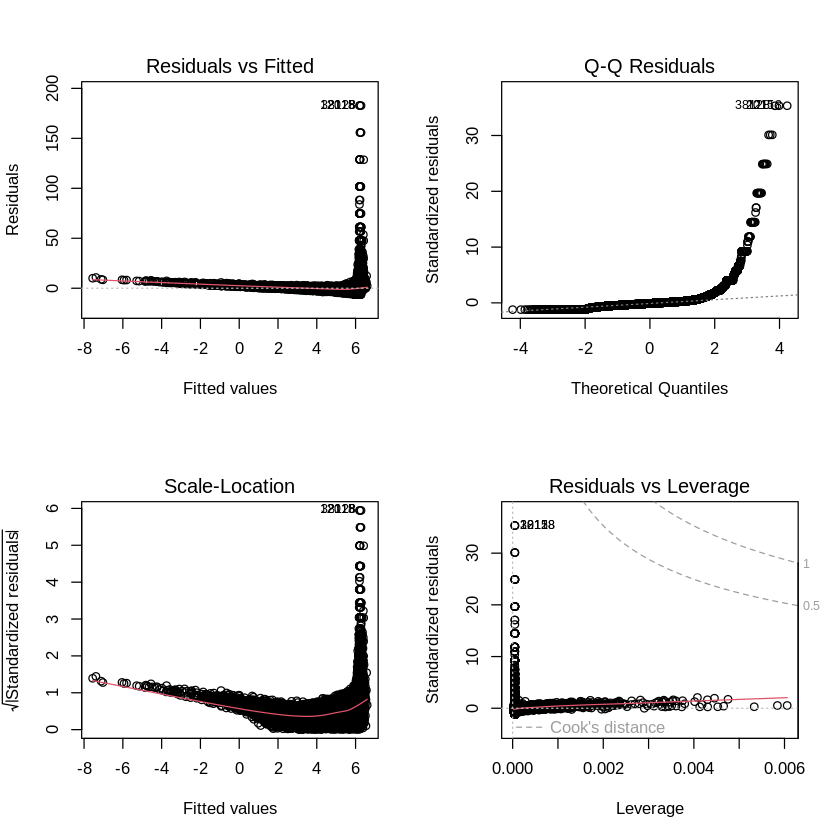

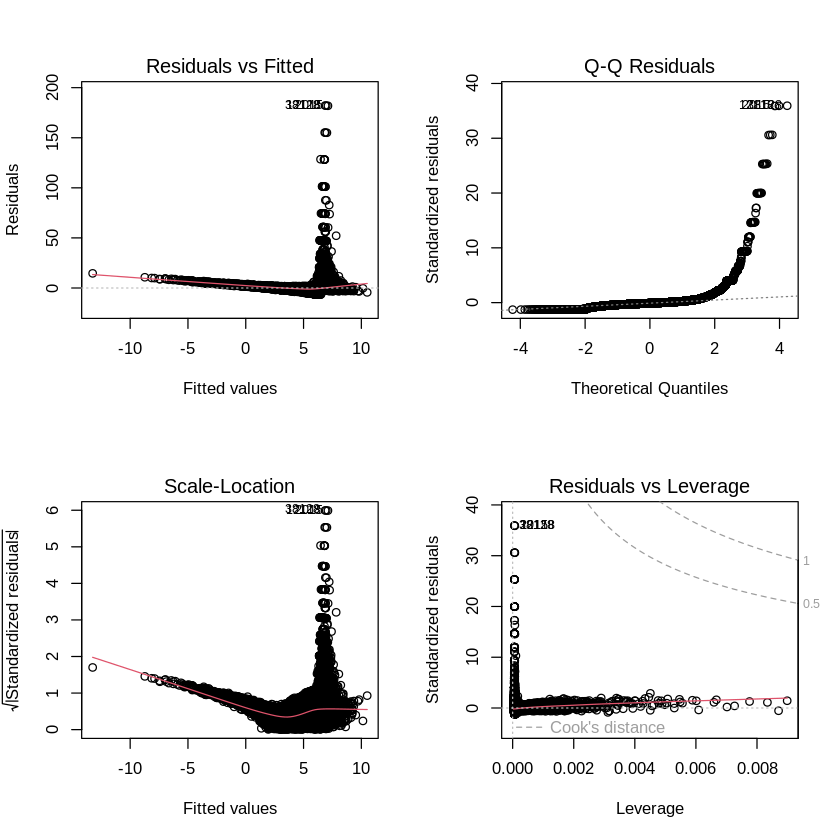

In [ ]:
# Plot Residuals vs Fitted, QQ Residuals, Scale-Location, and Residuals vs Leverage
par(mfrow = c(2,2))
plot(era_lm)
plot(era_lm2)

Since the Adjusted $R^2$ was not great for these models, we wanted to see if there was a better linear model that did capture the variance better. So we decided to try and predict pitchers Earned Run Average (ERA) by trying different combinations of predictors using regsubsets.

In [ ]:
## Predicting Pitchers ERA
# Define relevant predictors manually
predictors <- c("SO", "BB", "HR", "IPouts", "ER", "H", "GS")
# Strikeouts, Walks, Homeruns, Outs Pitched, Earned Runs,
# Hits Allowed, Games Started

# Filter dataset to include only relevant predictors and response variable
pitching_data_filtered <- pitching_data[, c("ERA", predictors)]

# Perform all subset selection
all_models <- regsubsets(ERA ~ ., data = pitching_data_filtered, nvmax = length(predictors))

# Extract model summaries
summary_all <- summary(all_models)
summary_all
names(summary_all)

# Initialize results dataframe
model_results <- data.frame(
  Predictors = character(),
  AIC = numeric(),
  BIC = numeric(),
  Adj_R2 = numeric(),
  stringsAsFactors = FALSE
)

# Loop through models to compute metrics
for (i in 1:nrow(summary_all$which)) {
  # Get selected predictors
  selected_predictors <- names(pitching_data_filtered)[summary_all$which[i, ]]

  # Create formula dynamically
  formula <- as.formula(paste("ERA ~", paste(selected_predictors, collapse = " + ")))

  # Fit the model
  model <- lm(formula, data = pitching_data_filtered)

  # Compute metrics
  aic_value <- AIC(model)
  bic_value <- BIC(model)
  adj_r_squared <- summary(model)$adj.r.squared

  # Save results
  model_results <- rbind(
    model_results,
    data.frame(
      Predictors = paste(selected_predictors, collapse = ", "),
      AIC = aic_value,
      BIC = bic_value,
      Adj_R2 = adj_r_squared
    )
  )
}

# Display model results
model_results

# Display the best model for each metric
min_aic <- min(model_results$AIC)
min_aic_model <- model_results[model_results$AIC == min_aic, ]
min_aic
min_aic_model

min_bic <- min(model_results$BIC)
min_bic_model <- model_results[model_results$BIC == min_bic, ]
min_bic
min_bic_model

max_adj_r2 <- max(model_results$Adj_R2)
max_adj_r2_model <- model_results[model_results$Adj_R2 == max_adj_r2, ]
max_adj_r2
max_adj_r2_model

Subset selection object
Call: regsubsets.formula(ERA ~ ., data = pitching_data_filtered, nvmax = length(predictors))
7 Variables  (and intercept)
       Forced in Forced out
SO         FALSE      FALSE
BB         FALSE      FALSE
HR         FALSE      FALSE
IPouts     FALSE      FALSE
ER         FALSE      FALSE
H          FALSE      FALSE
GS         FALSE      FALSE
1 subsets of each size up to 7
Selection Algorithm: exhaustive
         SO  BB  HR  IPouts ER  H   GS 
1  ( 1 ) " " " " " " "*"    " " " " " "
2  ( 1 ) " " " " " " "*"    "*" " " " "
3  ( 1 ) " " " " " " "*"    "*" " " "*"
4  ( 1 ) " " " " "*" "*"    "*" " " "*"
5  ( 1 ) " " "*" "*" "*"    "*" " " "*"
6  ( 1 ) " " "*" "*" "*"    "*" "*" "*"
7  ( 1 ) "*" "*" "*" "*"    "*" "*" "*"

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

Warning message in model.matrix.default(mt, mf, contrasts):
“the response appeared on the right-hand side and was dropped”
Warning message in model.matrix.default(mt, mf, contrasts):
“problem with term 1 in model.matrix: no columns are assigned”
Warning message in model.matrix.default(mt, mf, contrasts):
“the response appeared on the right-hand side and was dropped”
Warning message in model.matrix.default(mt, mf, contrasts):
“problem with term 1 in model.matrix: no columns are assigned”
Warning message in model.matrix.default(mt, mf, contrasts):
“the response appeared on the right-hand side and was dropped”
Warning message in model.matrix.default(mt, mf, contrasts):
“problem with term 1 in model.matrix: no columns are assigned”
Warning message in model.matrix.default(mt, mf, contrasts):
“the response appeared on the right-hand side and was dropped”
Warning message in model.matrix.default(mt, mf, contrasts):
“problem with term 1 in model.matrix: no columns are assigned”
Warning message 

Predictors,AIC,BIC,Adj_R2
<chr>,<dbl>,<dbl>,<dbl>
"ERA, IPouts",270121.3,270147.3,0.05261283
"ERA, IPouts, ER",268919.0,268953.8,0.07814053
"ERA, IPouts, ER, GS",268579.4,268622.9,0.08524143
"ERA, HR, IPouts, ER, GS",268257.6,268309.8,0.09192041
"ERA, BB, HR, IPouts, ER, GS",268087.3,268148.1,0.09544621
"ERA, BB, HR, IPouts, ER, H, GS",268009.2,268078.7,0.09706934
"ERA, SO, BB, HR, IPouts, ER, H, GS",267999.7,268078.0,0.09728311


[1] 267999.7

,Predictors,AIC,BIC,Adj_R2
,<chr>,<dbl>,<dbl>,<dbl>
7,"ERA, SO, BB, HR, IPouts, ER, H, GS",267999.7,268078,0.09728311


[1] 268078

,Predictors,AIC,BIC,Adj_R2
,<chr>,<dbl>,<dbl>,<dbl>
7,"ERA, SO, BB, HR, IPouts, ER, H, GS",267999.7,268078,0.09728311


[1] 0.09728311

,Predictors,AIC,BIC,Adj_R2
,<chr>,<dbl>,<dbl>,<dbl>
7,"ERA, SO, BB, HR, IPouts, ER, H, GS",267999.7,268078,0.09728311


Note here that model 7 is the only model that keeps Strikeouts (SO) as a predictor variable. This is interesting because we saw before that there is an exponential decay-like relationship between Strikeouts by pitchers and their ERA. This also aligns with our ANOVA test from earlier, that the full model with all seven predictors are significant.

According to all metrics, `AIC`, `BIC`, and Adjusted $R^2$, model 7 with all seven predictors is the best. As seen before from the violations in assumptions, a non-linear model would be a better fit (via GAMs) since the Adjusted $R^2$ for model 7 is extremely low to be selected as the best model.

# 3. Salaries, Fielding, and Batting

In [ ]:
# Build dataframe that merges salary and fielding
salary_fielding_data <- merge(fielding_data, salary_data,
                              by = c("playerID", "yearID", "teamID", "lgID")) # merge based on these columns
# View dataframe
head(salary_fielding_data)

,playerID,yearID,teamID,lgID,stint,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR,salary
,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,aardsda01,2004,SFN,NL,1,P,11,NA,33,0,0,0,0,NA,NA,NA,NA,NA,300000
2,aardsda01,2007,CHA,AL,1,P,25,NA,96,2,4,1,0,NA,NA,NA,NA,NA,387500
3,aardsda01,2008,BOS,AL,1,P,47,NA,147,3,6,0,0,NA,NA,NA,NA,NA,403250
4,aardsda01,2009,SEA,AL,1,P,73,NA,213,2,5,0,1,NA,NA,NA,NA,NA,419000
5,aardsda01,2010,SEA,AL,1,P,53,NA,150,2,3,1,0,NA,NA,NA,NA,NA,2750000
6,aardsda01,2012,NYA,AL,1,P,1,NA,3,0,0,0,0,NA,NA,NA,NA,NA,500000


### What position makes the most? What position makes the least?


# A tibble: 11 × 2
   POS   avg_salary
   <chr>      <dbl>
 1 1B      2266841.
 2 OF      2079442.
 3 P       1862235.
 4 RF      1778585.
 5 CF      1758170.
 6 LF      1606448.
 7 3B      1574785.
 8 SS      1525056.
 9 2B      1367368.
10 C       1365087.
11 DH      1149819.


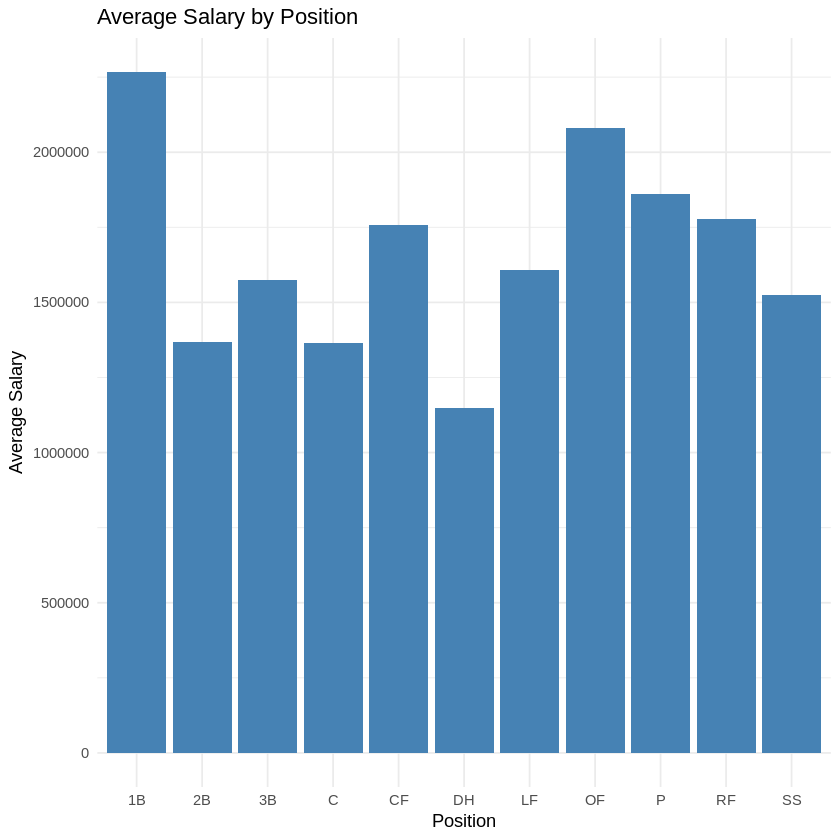

In [ ]:
# Compute the average salary for each position
avg_salary_by_pos <- salary_fielding_data %>%
  group_by(POS) %>% # group data by position
  summarise(avg_salary = mean(salary, na.rm = TRUE)) %>% # compute avg salary per position, exclude NA values
  arrange(desc(avg_salary)) # sort by descending order

# Display the position with the highest average salary
highest_paid_position <- avg_salary_by_pos %>%
  slice_max(avg_salary) # get position w highest salary

# Print results
print(avg_salary_by_pos)

# Create a bar plot
ggplot(avg_salary_by_pos, aes(x = POS, y = avg_salary)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Average Salary by Position",
       x = "Position",
       y = "Average Salary") +
  theme_minimal()

The highest paid position is First Base (1B) with an average saslary of \$2,266,841. The lowest paid position is Designated Hitter (DH) with an average salary of \$1,149,819.

### Are there any correlations between salary and fielding position?

To see if there are any correlations (or in our case similaries), we visualized this using a heat map. A simple interpretation of the map is as follows:

* Each cell in the heatmap will show the similarity between two positions based on their salaries.
* A similarity of 1 means the positions have identical average salaries (lower differences), while lower values indicate larger differences.


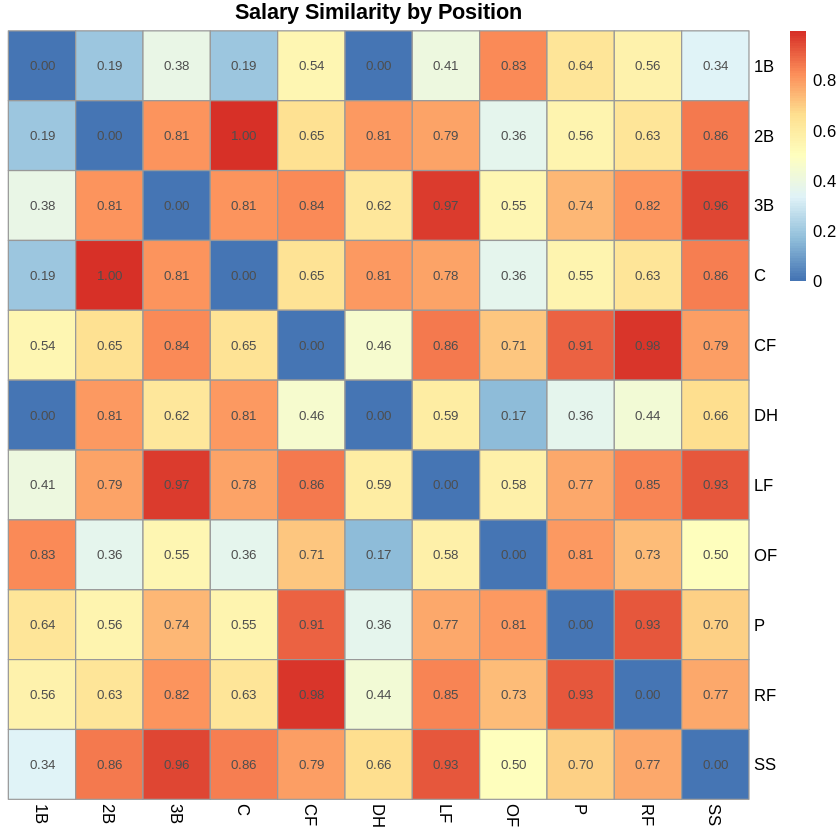

In [ ]:
# Compute average/mean salary by position
avg_salary_by_pos <- salary_fielding_data %>%
  group_by(POS) %>%
  summarise(avg_salary = mean(salary, na.rm = TRUE))

# Create a correlation-like matrix (reshape2 library)
# Calculate pairwise distances between positions based on salary differences
salary_matrix <- dist(avg_salary_by_pos$avg_salary) # Convert avg salary by position into distance matrix
salary_corr <- as.matrix(1 - salary_matrix / max(salary_matrix)) # Convert dist matrix into similarity matrix

# Add row/column names to the matrix
rownames(salary_corr) <- colnames(salary_corr) <- avg_salary_by_pos$POS

# Visualize the heatmap via pheatmap library
pheatmap(salary_corr,
         display_numbers = TRUE,
         cluster_rows = FALSE,
         cluster_cols = FALSE,
         main = "Salary Similarity by Position")

We are most surprised that the Second Base position and Catcher have a similarity of 1. We can double check this with the code below.

In [ ]:
# Check the average salaries for positions 2B and C
avg_salary_2B <- avg_salary_by_pos$avg_salary[avg_salary_by_pos$POS == "2B"]
avg_salary_C <- avg_salary_by_pos$avg_salary[avg_salary_by_pos$POS == "C"]

avg_salary_3B <- avg_salary_by_pos$avg_salary[avg_salary_by_pos$POS == "3B"]
avg_salary_LF <- avg_salary_by_pos$avg_salary[avg_salary_by_pos$POS == "LF"]

avg_salary_SS <- avg_salary_by_pos$avg_salary[avg_salary_by_pos$POS == "SS"]

avg_salary_CF <- avg_salary_by_pos$avg_salary[avg_salary_by_pos$POS == "CF"]
avg_salary_RF <- avg_salary_by_pos$avg_salary[avg_salary_by_pos$POS == "RF"]

avg_salary_1B <- avg_salary_by_pos$avg_salary[avg_salary_by_pos$POS == "1B"]
avg_salary_DH <- avg_salary_by_pos$avg_salary[avg_salary_by_pos$POS == "DH"]

# Check average salaries for positions that are similar (low diff, high similarity in salary)
cat("Average salary for 2B:", avg_salary_2B, "\n")
cat("Average salary for C:", avg_salary_C, "\n")
cat("Difference between 2B and C:", abs(avg_salary_2B-avg_salary_C), "\n")

cat("Average salary for 3B:", avg_salary_3B, "\n")
cat("Average salary for LF:", avg_salary_LF, "\n")
cat("Difference between 3B and LF:", abs(avg_salary_3B-avg_salary_LF), "\n")

cat("Average salary for 3B:", avg_salary_3B, "\n")
cat("Average salary for SS:", avg_salary_SS, "\n")
cat("Difference between 3B and SS:", abs(avg_salary_3B-avg_salary_SS), "\n")

cat("Average salary for CF:", avg_salary_CF, "\n")
cat("Average salary for RF:", avg_salary_RF, "\n")
cat("Difference between CF and RF:", abs(avg_salary_CF-avg_salary_RF), "\n")

# Example with big difference, low similarity in salary
cat("Average salary for 1B:", avg_salary_1B, "\n")
cat("Average salary for C:", avg_salary_C, "\n")
cat("Difference between 1B and C:", abs(avg_salary_1B-avg_salary_C), "\n")

# Example with similarity of zero
cat("Average salary for 1B:", avg_salary_1B, "\n")
cat("Average salary for DH:", avg_salary_DH, "\n")
cat("Difference between 1B and DH:", abs(avg_salary_1B-avg_salary_DH), "\n")

Average salary for 2B: 1367368 
Average salary for C: 1365087 
Difference between 2B and C: 2280.226 
Average salary for 3B: 1574785 
Average salary for LF: 1606448 
Difference between 3B and LF: 31663.15 
Average salary for 3B: 1574785 
Average salary for SS: 1525056 
Difference between 3B and SS: 49728.98 
Average salary for CF: 1758170 
Average salary for RF: 1778585 
Difference between CF and RF: 20415.33 
Average salary for 1B: 2266841 
Average salary for C: 1365087 
Difference between 1B and C: 901753.2 
Average salary for 1B: 2266841 
Average salary for DH: 1149819 
Difference between 1B and DH: 1117022 


Relative to other mean differences in salary, a mean difference of 49,728 is low indicating high similarity (as shown by 3B and SS). We can see this from comparing it to a mean difference of positions with low similarity. For example, a mean difference of 901,753 is much larger (shown by 1B and C).

Another important thing to notice is that from the previous section we conclude the highest and lowest paid positions are 1B and DH, relatively. This makes sense why their similarity score is zero. They have a very large difference in mean salary of \$1,117,022.

### Predicting salary for pitchers via ANOVA. What are the most relevant predictors?

We first need to extract data from the merged dataframe. We specifically want the salary data for pitchers only. Then we need to merge the pitching data with the salary_fielding_data (that contains position and salary). After that, we need to clean the data which means removing rows that contain missing values (`NA`) and removing columns that contain all `NA` values (shown below).

In [ ]:
# Reduce fielding_data to only identifiers and position columns
reduced_fielding_data <- fielding_data %>%
  select(playerID, yearID, teamID, lgID, POS)

# Merge salary_data with reduced_fielding_data
salary_fielding_data <- merge(reduced_fielding_data, salary_data,
                              by = c("playerID", "yearID", "teamID", "lgID"))

# Extract pitcher data
pitcher_salary_data <- salary_fielding_data %>%
  filter(POS == "P")

# Merge pitcher salary data with pitching_data (dataset with salaries of pitchers only)
pitcher_data <- merge(pitcher_salary_data, pitching_data,
                                by = c("playerID", "yearID", "teamID", "lgID"))

# View dataset before cleaning
head(pitcher_data)
colnames(pitcher_data)

# Data Cleaning
cat("Total Number of Rows Before Cleaning:")
nrow(pitcher_data) # 11537
sapply(pitcher_data, function(x) sum(is.na(x)))

# Drop GIDP (Ground Into Double Play) column with 11152 missing values
pitcher_data <- pitcher_data %>% select(-GIDP)

# Drop rows with NA, the columns with NA are ERA, BAOpp, SH, and SF
pitcher_data <- pitcher_data %>% drop_na(ERA, BAOpp, SH, SF)

# View dataset after cleaning
head(pitcher_data)
cat("Total Number of Rows After Cleaning:")
nrow(pitcher_data)
colnames(pitcher_data)
sapply(pitcher_data, function(x) sum(is.na(x)))

,playerID,yearID,teamID,lgID,POS,salary,stint,W,L,G,⋯,BK,BFP,GF,R,SH,SF,GIDP,walk_rate,strikeout_percentage,K_BB_ratio
,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,aardsda01,2004,SFN,NL,P,300000,1,1,0,11,⋯,0,61,5,8,0,1,NA,16.39344,8.196721,0.500000
2,aardsda01,2007,CHA,AL,P,387500,1,2,1,25,⋯,0,151,7,24,2,1,NA,11.25828,23.841060,2.117647
3,aardsda01,2008,BOS,AL,P,403250,1,4,2,47,⋯,0,228,7,32,3,2,NA,15.35088,21.491228,1.400000
4,aardsda01,2009,SEA,AL,P,419000,1,3,6,73,⋯,0,296,53,23,2,1,NA,11.48649,27.027027,2.352941
5,aardsda01,2010,SEA,AL,P,2750000,1,0,6,53,⋯,0,202,43,19,7,1,NA,12.37624,24.257426,1.960000
6,aardsda01,2012,NYA,AL,P,500000,1,0,0,1,⋯,0,5,1,1,0,0,NA,20.00000,20.000000,1.000000


[1] "playerID"             "yearID"               "teamID"              
 [4] "lgID"                 "POS"                  "salary"              
 [7] "stint"                "W"                    "L"                   
[10] "G"                    "GS"                   "CG"                  
[13] "SHO"                  "SV"                   "IPouts"              
[16] "H"                    "ER"                   "HR"                  
[19] "BB"                   "SO"                   "BAOpp"               
[22] "ERA"                  "IBB"                  "WP"                  
[25] "HBP"                  "BK"                   "BFP"                 
[28] "GF"                   "R"                    "SH"                  
[31] "SF"                   "GIDP"                 "walk_rate"           
[34] "strikeout_percentage" "K_BB_ratio"

Total Number of Rows Before Cleaning:

[1] 11537

playerID               yearID               teamID 
                   0                    0                    0 
                lgID                  POS               salary 
                   0                    0                    0 
               stint                    W                    L 
                   0                    0                    0 
                   G                   GS                   CG 
                   0                    0                    0 
                 SHO                   SV               IPouts 
                   0                    0                    0 
                   H                   ER                   HR 
                   0                    0                    0 
                  BB                   SO                BAOpp 
                   0                    0                  465 
                 ERA                  IBB                   WP 
                   6                    0                    0 
                 HBP                   BK                  BFP 
                   0                    0                    0 
                  GF                    R                   SH 
                   0                    0                 5320 
                  SF                 GIDP            walk_rate 
                5320                11152                    0 
strikeout_percentage           K_BB_ratio 
                   0                  140

,playerID,yearID,teamID,lgID,POS,salary,stint,W,L,G,⋯,HBP,BK,BFP,GF,R,SH,SF,walk_rate,strikeout_percentage,K_BB_ratio
,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,aardsda01,2004,SFN,NL,P,300000,1,1,0,11,⋯,2,0,61,5,8,0,1,16.39344,8.196721,0.500000
2,aardsda01,2007,CHA,AL,P,387500,1,2,1,25,⋯,1,0,151,7,24,2,1,11.25828,23.841060,2.117647
3,aardsda01,2008,BOS,AL,P,403250,1,4,2,47,⋯,5,0,228,7,32,3,2,15.35088,21.491228,1.400000
4,aardsda01,2009,SEA,AL,P,419000,1,3,6,73,⋯,0,0,296,53,23,2,1,11.48649,27.027027,2.352941
5,aardsda01,2010,SEA,AL,P,2750000,1,0,6,53,⋯,2,0,202,43,19,7,1,12.37624,24.257426,1.960000
6,aardsda01,2012,NYA,AL,P,500000,1,0,0,1,⋯,0,0,5,1,1,0,0,20.00000,20.000000,1.000000


Total Number of Rows After Cleaning:

[1] 6214

[1] "playerID"             "yearID"               "teamID"              
 [4] "lgID"                 "POS"                  "salary"              
 [7] "stint"                "W"                    "L"                   
[10] "G"                    "GS"                   "CG"                  
[13] "SHO"                  "SV"                   "IPouts"              
[16] "H"                    "ER"                   "HR"                  
[19] "BB"                   "SO"                   "BAOpp"               
[22] "ERA"                  "IBB"                  "WP"                  
[25] "HBP"                  "BK"                   "BFP"                 
[28] "GF"                   "R"                    "SH"                  
[31] "SF"                   "walk_rate"            "strikeout_percentage"
[34] "K_BB_ratio"

playerID               yearID               teamID 
                   0                    0                    0 
                lgID                  POS               salary 
                   0                    0                    0 
               stint                    W                    L 
                   0                    0                    0 
                   G                   GS                   CG 
                   0                    0                    0 
                 SHO                   SV               IPouts 
                   0                    0                    0 
                   H                   ER                   HR 
                   0                    0                    0 
                  BB                   SO                BAOpp 
                   0                    0                    0 
                 ERA                  IBB                   WP 
                   0                    0                    0 
                 HBP                   BK                  BFP 
                   0                    0                    0 
                  GF                    R                   SH 
                   0                    0                    0 
                  SF            walk_rate strikeout_percentage 
                   0                    0                    0 
          K_BB_ratio 
                  89

In [ ]:
# Full model
lm_pitchers_full <- lm(salary ~ W + L + G + GS + CG + SHO + IPouts + H + ER + HR + BB + SO + BAOpp + ERA + IBB + HBP + R + SH + SF, data = pitcher_data)
summary(lm_pitchers_full)
# Reduce model - contains predictors that are significant from the full model
lm_pitchers_red <- lm(salary ~ L + GS + IPouts + ER + HR + BB + SO + IBB + R, data = pitcher_data)
summary(lm_pitchers_red)
# Second reduced model (- IPouts)
lm_pitchers_red2 <- lm(salary ~ L + GS + ER + HR + BB + SO + IBB + R, data = pitcher_data)
summary(lm_pitchers_red2)

# ANOVA: anova(reduced, full)
# compare full vs reduced
anova(lm_pitchers_red, lm_pitchers_full)
# compare reduced vs reduced2
anova(lm_pitchers_red2, lm_pitchers_red)
# compare full vs reduced2
anova(lm_pitchers_red2, lm_pitchers_full)


Call:
lm(formula = salary ~ W + L + G + GS + CG + SHO + IPouts + H + 
    ER + HR + BB + SO + BAOpp + ERA + IBB + HBP + R + SH + SF, 
    data = pitcher_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-8695570 -1718149  -839242   883008 23270599 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2632815.3   300222.2   8.770  < 2e-16 ***
W              39692.0    24097.1   1.647  0.09957 .  
L             115637.7    25378.1   4.557 5.30e-06 ***
G                138.6     5377.0   0.026  0.97944    
GS            118182.8    25593.8   4.618 3.96e-06 ***
CG             63119.9    78938.2   0.800  0.42397    
SHO            13242.8   142560.3   0.093  0.92599    
IPouts         -5124.2     2512.4  -2.040  0.04144 *  
H               7244.1     6711.7   1.079  0.28048    
ER             45109.9    18244.3   2.473  0.01344 *  
HR            -31684.6    14244.9  -2.224  0.02617 *  
BB            -60719.3     5251.8 -11.562  < 2e-16 ***
SO    


Call:
lm(formula = salary ~ L + GS + IPouts + ER + HR + BB + SO + IBB + 
    R, data = pitcher_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-8708790 -1682456  -863931   907563 22937782 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2071906.1    98671.5  20.998  < 2e-16 ***
L            112504.5    23966.1   4.694 2.73e-06 ***
GS           114941.3    11395.1  10.087  < 2e-16 ***
IPouts         -237.3     1155.0  -0.205  0.83721    
ER            41668.4    17979.3   2.318  0.02050 *  
HR           -35341.4    13714.1  -2.577  0.00999 ** 
BB           -62200.8     4484.3 -13.871  < 2e-16 ***
SO            25552.0     2437.6  10.482  < 2e-16 ***
IBB          -51234.6    22980.1  -2.230  0.02582 *  
R            -46130.6    16888.8  -2.731  0.00632 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3416000 on 6204 degrees of freedom
Multiple R-squared:  0.1829,	Adjusted R-squared:  0.1817 


Call:
lm(formula = salary ~ L + GS + ER + HR + BB + SO + IBB + R, data = pitcher_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-8699918 -1681321  -864444   910620 22936440 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2067732      96551  21.416  < 2e-16 ***
L             112586      23961   4.699 2.67e-06 ***
GS            113908      10224  11.141  < 2e-16 ***
ER             41795      17967   2.326  0.02004 *  
HR            -35433      13706  -2.585  0.00975 ** 
BB            -62161       4480 -13.876  < 2e-16 ***
SO             25169       1574  15.996  < 2e-16 ***
IBB           -52480      22164  -2.368  0.01792 *  
R             -46690      16666  -2.801  0.00510 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3415000 on 6205 degrees of freedom
Multiple R-squared:  0.1829,	Adjusted R-squared:  0.1818 
F-statistic: 173.6 on 8 and 6205 DF,  p-value: < 2.2e-16


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6204,7.237506e+16,NA,NA,NA,NA
2,6194,7.215480e+16,10,2.202621e+14,1.890801,0.04166401


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6205,7.237556e+16,NA,NA,NA,NA
2,6204,7.237506e+16,1,492540372816,0.04222063,0.8372065


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6205,7.237556e+16,NA,NA,NA,NA
2,6194,7.215480e+16,11,2.207547e+14,1.722754,0.06226846


From the above outputs, the `p-value` for comparing the full model and first reduced model is `0.0416` which is less than 0.05, so we reject the null hypothesis that the model is sufficient. This makes sense from the summaries of the reduced and full model because the Adjusted $R^2$ value is higher for the full model than the reduced model. These linear models are probably not the best to fit the data because the Adjusted $R^2$ value is still quite low for the better full model (`0.1829`).

### Predicting Salary based on Hitting/Batting (excluding pitchers). What are the most significant predictors?

Next we want to try to see if hitting or batting statistics are influential on predicting salary. We start by merging the batting, salary, and fielding data and cleaning the new dataframe.

In [ ]:
# Merge 3 dataframes: batting, fielding, and salary data

# Merge batting_data and salary_data
fully_merged_data <- batting_data %>%
  inner_join(salary_data, by = c("playerID", "yearID", "teamID", "lgID")) %>%
  inner_join(fielding_data, by = c("playerID", "yearID", "teamID", "lgID"))

# View the dataframe
head(fully_merged_data)
nrow(fully_merged_data)
colnames(fully_merged_data)

# Data Cleaning: Keep relative columns, remove others
cleaned_data <- fully_merged_data %>%
  select(
    playerID, yearID, teamID, lgID, stint = stint.x, G = G.x, AB, R, H, X2B, X3B, HR, RBI,
    SB = SB.x, CS = CS.x, BB, SO, IBB, HBP, SH, SF, GIDP, salary, POS
  ) %>%
  filter(POS != "P")  # Exclude pitchers

# Confirm pitchers are excluded
unique(cleaned_data$POS)

# View the dataframe
head(cleaned_data)
nrow(cleaned_data)
colnames(cleaned_data)
# summary(cleaned_data)

Warning message in inner_join(., fielding_data, by = c("playerID", "yearID", "teamID", :
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 3 of `x` matches multiple rows in `y`.
ℹ Row 123888 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


,playerID,yearID,stint.x,teamID,lgID,G.x,AB,R,H,X2B,⋯,InnOuts,PO,A,E,DP,PB,WP,SB.y,CS.y,ZR
,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ackerji01,1985,1,TOR,AL,61,NA,NA,NA,NA,⋯,259,10,16,0,1,NA,NA,NA,NA,NA
2,agostju01,1985,1,CHA,AL,54,0,0,0,0,⋯,181,10,15,1,0,NA,NA,NA,NA,NA
3,aguaylu01,1985,1,PHI,NL,91,165,27,46,7,⋯,192,27,25,1,5,NA,NA,NA,NA,NA
4,aguaylu01,1985,1,PHI,NL,91,165,27,46,7,⋯,126,4,16,0,1,NA,NA,NA,NA,NA
5,aguaylu01,1985,1,PHI,NL,91,165,27,46,7,⋯,1052,61,117,8,21,NA,NA,NA,NA,NA
6,alexado01,1985,1,TOR,AL,36,NA,NA,NA,NA,⋯,782,28,32,1,4,NA,NA,NA,NA,NA


[1] 46883

[1] "playerID"             "yearID"               "stint.x"             
 [4] "teamID"               "lgID"                 "G.x"                 
 [7] "AB"                   "R"                    "H"                   
[10] "X2B"                  "X3B"                  "HR"                  
[13] "RBI"                  "SB.x"                 "CS.x"                
[16] "BB"                   "SO"                   "IBB"                 
[19] "HBP"                  "SH"                   "SF"                  
[22] "GIDP"                 "BA"                   "OBP"                 
[25] "SB_percent"           "walk_rate"            "strikeout_percentage"
[28] "log_SO"               "log_AB"               "log_HR"              
[31] "log_BB"               "salary"               "stint.y"             
[34] "POS"                  "G.y"                  "GS"                  
[37] "InnOuts"              "PO"                   "A"                   
[40] "E"                    "DP"                   "PB"                  
[43] "WP"                   "SB.y"                 "CS.y"                
[46] "ZR"

[1] "2B" "3B" "SS" "1B" "CF" "LF" "OF" "DH" "RF" "C"

,playerID,yearID,teamID,lgID,stint,G,AB,R,H,X2B,⋯,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary,POS
,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,aguaylu01,1985,PHI,NL,1,91,165,27,46,7,⋯,0,22,26,5,6,4,3,7,237000,2B
2,aguaylu01,1985,PHI,NL,1,91,165,27,46,7,⋯,0,22,26,5,6,4,3,7,237000,3B
3,aguaylu01,1985,PHI,NL,1,91,165,27,46,7,⋯,0,22,26,5,6,4,3,7,237000,SS
4,almonbi01,1985,PIT,NL,1,88,244,33,66,17,⋯,7,22,61,0,1,4,3,6,255000,1B
5,almonbi01,1985,PIT,NL,1,88,244,33,66,17,⋯,7,22,61,0,1,4,3,6,255000,3B
6,almonbi01,1985,PIT,NL,1,88,244,33,66,17,⋯,7,22,61,0,1,4,3,6,255000,CF


[1] 35346

[1] "playerID" "yearID"   "teamID"   "lgID"     "stint"    "G"       
 [7] "AB"       "R"        "H"        "X2B"      "X3B"      "HR"      
[13] "RBI"      "SB"       "CS"       "BB"       "SO"       "IBB"     
[19] "HBP"      "SH"       "SF"       "GIDP"     "salary"   "POS"

Now we identify the full model and the reduced model. The predictors for the reduced model are determined from the significant predictors of the full model. We follow up with an Analysis of Variance (ANOVA) test, to determine which model is sufficient.

In [ ]:
# Fit a linear model with hitting data
lm_hitting_salary_full <- lm(salary ~ AB + R + H + X2B + X3B + HR + RBI + SB + CS + BB + SO + IBB + HBP + SH + SF + GIDP, data = cleaned_data)
summary(lm_hitting_salary_full)

lm_hitting_salary_red <- lm(salary ~ AB + R + X3B + HR + RBI + SB + CS + BB + IBB + HBP + SH + GIDP, data = cleaned_data)
summary(lm_hitting_salary_red)

anova(lm_hitting_salary_red, lm_hitting_salary_full)


Call:
lm(formula = salary ~ AB + R + H + X2B + X3B + HR + RBI + SB + 
    CS + BB + SO + IBB + HBP + SH + SF + GIDP, data = cleaned_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-7850485 -1181924  -409391   253221 30077427 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  331930.2    29730.0  11.165  < 2e-16 ***
AB             2434.7      574.7   4.237 2.27e-05 ***
R             14480.0     2464.9   5.874 4.28e-09 ***
H              1949.3     2157.1   0.904    0.366    
X2B           -2062.7     3590.3  -0.575    0.566    
X3B         -138437.2     9077.2 -15.251  < 2e-16 ***
HR            40988.8     5109.2   8.023 1.07e-15 ***
RBI          -14641.0     2291.1  -6.390 1.68e-10 ***
SB            23742.9     2697.4   8.802  < 2e-16 ***
CS          -150290.2     7426.1 -20.238  < 2e-16 ***
BB            13744.1     1356.0  10.136  < 2e-16 ***
SO            -1283.0      916.0  -1.401    0.161    
IBB           70174.3     5429.6  12.924


Call:
lm(formula = salary ~ AB + R + X3B + HR + RBI + SB + CS + BB + 
    IBB + HBP + SH + GIDP, data = cleaned_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-7864903 -1183542  -407356   257532 30103332 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  318286.9    28742.3  11.074  < 2e-16 ***
AB             2463.7      308.6   7.984 1.46e-15 ***
R             16227.2     2081.2   7.797 6.52e-15 ***
X3B         -139031.3     8988.3 -15.468  < 2e-16 ***
HR            36275.7     4283.3   8.469  < 2e-16 ***
RBI          -13487.9     1958.0  -6.889 5.73e-12 ***
SB            23729.8     2669.9   8.888  < 2e-16 ***
CS          -149818.2     7414.2 -20.207  < 2e-16 ***
BB            12894.1     1271.6  10.140  < 2e-16 ***
IBB           73181.7     5217.6  14.026  < 2e-16 ***
HBP           39855.9     5296.2   7.525 5.38e-14 ***
SH          -131209.2     6298.2 -20.833  < 2e-16 ***
GIDP          52622.1     4642.9  11.334  < 2e-16 ***
---
Si

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,35333,2.557933e+17,NA,NA,NA,NA
2,35329,2.557605e+17,4,3.278722e+13,1.132251,0.3391415


From the above output, we see that with an `F-statistic` of `1.132251` and a high `p-value` of `0.33914`, which means we fail to reject the null hypothesis that the reduced model is sufficient. In other words, there is insufficient evidence to conclude that the added predictors in the full model provide a significant difference in prediction compared to the reduced model.

After concluding that the reduced model is better, we are interested in seeing if there is a different combination of predictors that provide a higher Adjusted $R^2$ than the reduced model already provides (0.2103). We continue below with three different feature selection methods.
1. Stepwise Feature Selection
2. Forward Feature Selection
3. Backward Feature Selection

In [ ]:
# Try stepwise feature selection
stepwise_model <- step(lm_hitting_salary_full, direction = "both")
summary(stepwise_model)

best_model <- regsubsets(salary ~ AB + R + H + X2B + X3B + HR + RBI + SB + CS + BB + SO + IBB + HBP + SH + SF + GIDP,
                         data = cleaned_data, nvmax = 10)
summary(best_model)

Start:  AIC=1046632
salary ~ AB + R + H + X2B + X3B + HR + RBI + SB + CS + BB + SO + 
    IBB + HBP + SH + SF + GIDP

       Df  Sum of Sq        RSS     AIC
- SF    1 6.9087e+11 2.5576e+17 1046630
- X2B   1 2.3896e+12 2.5576e+17 1046630
- H     1 5.9115e+12 2.5577e+17 1046631
- SO    1 1.4202e+13 2.5577e+17 1046632
<none>               2.5576e+17 1046632
- AB    1 1.2994e+14 2.5589e+17 1046648
- R     1 2.4982e+14 2.5601e+17 1046664
- RBI   1 2.9564e+14 2.5606e+17 1046671
- HBP   1 4.3062e+14 2.5619e+17 1046689
- HR    1 4.6594e+14 2.5623e+17 1046694
- SB    1 5.6091e+14 2.5632e+17 1046707
- BB    1 7.4373e+14 2.5650e+17 1046732
- GIDP  1 8.3820e+14 2.5660e+17 1046745
- IBB   1 1.2093e+15 2.5697e+17 1046797
- X3B   1 1.6839e+15 2.5744e+17 1046862
- CS    1 2.9651e+15 2.5873e+17 1047037
- SH    1 3.0662e+15 2.5883e+17 1047051

Step:  AIC=1046630
salary ~ AB + R + H + X2B + X3B + HR + RBI + SB + CS + BB + SO + 
    IBB + HBP + SH + GIDP

       Df  Sum of Sq        RSS     AIC
- X2B   1


Call:
lm(formula = salary ~ AB + R + X3B + HR + RBI + SB + CS + BB + 
    SO + IBB + HBP + SH + GIDP, data = cleaned_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-7795084 -1183657  -408604   254740 30075165 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  328273.9    29224.5  11.233  < 2e-16 ***
AB             2802.0      356.9   7.851 4.23e-15 ***
R             15176.0     2154.4   7.044 1.90e-12 ***
X3B         -137676.1     9016.7 -15.269  < 2e-16 ***
HR            40241.0     4770.9   8.435  < 2e-16 ***
RBI          -14077.8     1982.8  -7.100 1.27e-12 ***
SB            23823.4     2670.2   8.922  < 2e-16 ***
CS          -149982.4     7414.5 -20.228  < 2e-16 ***
BB            13551.7     1318.4  10.279  < 2e-16 ***
SO            -1601.4      848.7  -1.887   0.0592 .  
IBB           70753.1     5373.8  13.166  < 2e-16 ***
HBP           40868.5     5323.1   7.678 1.66e-14 ***
SH          -131849.6     6307.1 -20.905  < 2e-16 ***
G

Subset selection object
Call: regsubsets.formula(salary ~ AB + R + H + X2B + X3B + HR + RBI + 
    SB + CS + BB + SO + IBB + HBP + SH + SF + GIDP, data = cleaned_data, 
    nvmax = 10)
16 Variables  (and intercept)
     Forced in Forced out
AB       FALSE      FALSE
R        FALSE      FALSE
H        FALSE      FALSE
X2B      FALSE      FALSE
X3B      FALSE      FALSE
HR       FALSE      FALSE
RBI      FALSE      FALSE
SB       FALSE      FALSE
CS       FALSE      FALSE
BB       FALSE      FALSE
SO       FALSE      FALSE
IBB      FALSE      FALSE
HBP      FALSE      FALSE
SH       FALSE      FALSE
SF       FALSE      FALSE
GIDP     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          AB  R   H   X2B X3B HR  RBI SB  CS  BB  SO  IBB HBP SH  SF  GIDP
1  ( 1 )  " " " " " " " " " " "*" " " " " " " " " " " " " " " " " " " " " 
2  ( 1 )  " " " " " " " " " " "*" " " " " " " "*" " " " " " " " " " " " " 
3  ( 1 )  " " "*" " " " " " " " " " " " " "*" " " " " 

In [ ]:
# Try forward feature selection
# Start with an empty model
empty_model <- lm(salary ~ 1, data = cleaned_data)

# Full model with all predictors (from above)
lm_hitting_salary_full <- lm(salary ~ AB + R + H + X2B + X3B + HR + RBI + SB + CS + BB + SO + IBB + HBP + SH + SF + GIDP, data = cleaned_data)

# Perform forward selection
forward_model <- step(empty_model,
                      scope = list(lower = empty_model, upper = lm_hitting_salary_full),
                      direction = "forward")

# Summary of the final model
summary(forward_model)

Start:  AIC=1054962
salary ~ 1

       Df  Sum of Sq        RSS     AIC
+ HR    1 4.8757e+16 2.7527e+17 1049200
+ RBI   1 4.8298e+16 2.7573e+17 1049259
+ BB    1 4.2723e+16 2.8130e+17 1049967
+ R     1 4.0727e+16 2.8330e+17 1050217
+ H     1 3.7875e+16 2.8615e+17 1050571
+ X2B   1 3.7683e+16 2.8634e+17 1050594
+ AB    1 3.7183e+16 2.8684e+17 1050656
+ GIDP  1 3.3430e+16 2.9060e+17 1051115
+ SO    1 3.2198e+16 2.9183e+17 1051265
+ IBB   1 3.2154e+16 2.9187e+17 1051270
+ SF    1 2.3446e+16 3.0058e+17 1052309
+ HBP   1 1.6271e+16 3.0776e+17 1053143
+ SH    1 5.4902e+15 3.1854e+17 1054360
+ SB    1 1.8538e+15 3.2217e+17 1054761
+ X3B   1 1.0165e+15 3.2301e+17 1054853
+ CS    1 5.0038e+14 3.2353e+17 1054910
<none>               3.2403e+17 1054962

Step:  AIC=1049200
salary ~ HR

       Df  Sum of Sq        RSS     AIC
+ BB    1 4.8779e+15 2.7039e+17 1048570
+ GIDP  1 4.8275e+15 2.7044e+17 1048577
+ IBB   1 4.1813e+15 2.7109e+17 1048661
+ X2B   1 2.9068e+15 2.7236e+17 1048827
+ H     1 2.705


Call:
lm(formula = salary ~ HR + BB + CS + GIDP + SH + R + X3B + IBB + 
    SB + HBP + AB + RBI + SO, data = cleaned_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-7795084 -1183657  -408604   254740 30075165 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  328273.9    29224.5  11.233  < 2e-16 ***
HR            40241.0     4770.9   8.435  < 2e-16 ***
BB            13551.7     1318.4  10.279  < 2e-16 ***
CS          -149982.4     7414.5 -20.228  < 2e-16 ***
GIDP          51062.0     4715.8  10.828  < 2e-16 ***
SH          -131849.6     6307.1 -20.905  < 2e-16 ***
R             15176.0     2154.4   7.044 1.90e-12 ***
X3B         -137676.1     9016.7 -15.269  < 2e-16 ***
IBB           70753.1     5373.8  13.166  < 2e-16 ***
SB            23823.4     2670.2   8.922  < 2e-16 ***
HBP           40868.5     5323.1   7.678 1.66e-14 ***
AB             2802.0      356.9   7.851 4.23e-15 ***
RBI          -14077.8     1982.8  -7.100 1.27e-12 ***
S

In [ ]:
# Try backward feature selection
# Full model with all predictors
lm_hitting_salary_full <- lm(salary ~ AB + R + H + X2B + X3B + HR + RBI + SB + CS + BB + SO + IBB + HBP + SH + SF + GIDP, data = cleaned_data)

# Perform backward selection
backward_model <- step(lm_hitting_salary_full, direction = "backward")

# Summary of the final model
summary(backward_model)

Start:  AIC=1046632
salary ~ AB + R + H + X2B + X3B + HR + RBI + SB + CS + BB + SO + 
    IBB + HBP + SH + SF + GIDP

       Df  Sum of Sq        RSS     AIC
- SF    1 6.9087e+11 2.5576e+17 1046630
- X2B   1 2.3896e+12 2.5576e+17 1046630
- H     1 5.9115e+12 2.5577e+17 1046631
- SO    1 1.4202e+13 2.5577e+17 1046632
<none>               2.5576e+17 1046632
- AB    1 1.2994e+14 2.5589e+17 1046648
- R     1 2.4982e+14 2.5601e+17 1046664
- RBI   1 2.9564e+14 2.5606e+17 1046671
- HBP   1 4.3062e+14 2.5619e+17 1046689
- HR    1 4.6594e+14 2.5623e+17 1046694
- SB    1 5.6091e+14 2.5632e+17 1046707
- BB    1 7.4373e+14 2.5650e+17 1046732
- GIDP  1 8.3820e+14 2.5660e+17 1046745
- IBB   1 1.2093e+15 2.5697e+17 1046797
- X3B   1 1.6839e+15 2.5744e+17 1046862
- CS    1 2.9651e+15 2.5873e+17 1047037
- SH    1 3.0662e+15 2.5883e+17 1047051

Step:  AIC=1046630
salary ~ AB + R + H + X2B + X3B + HR + RBI + SB + CS + BB + SO + 
    IBB + HBP + SH + GIDP

       Df  Sum of Sq        RSS     AIC
- X2B   1


Call:
lm(formula = salary ~ AB + R + X3B + HR + RBI + SB + CS + BB + 
    SO + IBB + HBP + SH + GIDP, data = cleaned_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-7795084 -1183657  -408604   254740 30075165 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  328273.9    29224.5  11.233  < 2e-16 ***
AB             2802.0      356.9   7.851 4.23e-15 ***
R             15176.0     2154.4   7.044 1.90e-12 ***
X3B         -137676.1     9016.7 -15.269  < 2e-16 ***
HR            40241.0     4770.9   8.435  < 2e-16 ***
RBI          -14077.8     1982.8  -7.100 1.27e-12 ***
SB            23823.4     2670.2   8.922  < 2e-16 ***
CS          -149982.4     7414.5 -20.228  < 2e-16 ***
BB            13551.7     1318.4  10.279  < 2e-16 ***
SO            -1601.4      848.7  -1.887   0.0592 .  
IBB           70753.1     5373.8  13.166  < 2e-16 ***
HBP           40868.5     5323.1   7.678 1.66e-14 ***
SH          -131849.6     6307.1 -20.905  < 2e-16 ***
G

Notice that the summary output of the model after each selection method has an Adjusted $R^2$ of $0.2104$, which is higher by only 0.0001. We can see there is a very small improvement from the reduced model in the ANOVA test above.

After conducting each feature selection method, we are interested in looking at the final predictors that each method provided for predicting salary. These are shown below.

In [ ]:
# Compare predictors from the three selection methods

cat("Predictors from Forward Selection \n")
# Get the formula of the final model
final_formula <- formula(forward_model)
# Extract the predictors (excluding the intercept term)
predictors <- all.vars(final_formula)[-1]  # Remove the intercept term
# Print the final predictors
print(predictors)

cat("Predictors from Backward Selection \n")
# Get the formula of the final model
final_formula <- formula(backward_model)
# Extract the predictors (excluding the intercept term)
predictors <- all.vars(final_formula)[-1]  # Remove the intercept term
# Print the final predictors
print(predictors)

cat("Predictors from Stepwise Selection \n")
# Get the formula of the stepwise model
final_formula <- formula(stepwise_model)
# Extract the predictor names (excluding the intercept term)
predictor_names <- all.vars(final_formula)[-1]  # Removing the intercept
# Print the final predictors
print(predictor_names)


Predictors from Forward Selection 
 [1] "HR"   "BB"   "CS"   "GIDP" "SH"   "R"    "X3B"  "IBB"  "SB"   "HBP" 
[11] "AB"   "RBI"  "SO"  
Predictors from Backward Selection 
 [1] "AB"   "R"    "X3B"  "HR"   "RBI"  "SB"   "CS"   "BB"   "SO"   "IBB" 
[11] "HBP"  "SH"   "GIDP"
Predictors from Stepwise Selection 
 [1] "AB"   "R"    "X3B"  "HR"   "RBI"  "SB"   "CS"   "BB"   "SO"   "IBB" 
[11] "HBP"  "SH"   "GIDP"


From the three selection methods, Backward and Stepwise Selection have exactly the same 13 final predictors:

1. At-Bats (AB)
2. Runs Scored (R)
3. Triples (X3B)
4. Homeruns (HR)
5. Runs Batting In (RBI)
6. Stolen Bases (SB)
7. Caught Stealing (CS)
8. Walks (BB)
9. Strikeouts (SO)
10. Intentional Walks (IBB)
11. Hit By Pitch (HBP)
12. Sacrifice Hit (SH)
13. Grounded Into Double Play (GIDP)

These predictors differ from the reduced model predictors. So we would want to select this model over the reduced model since we know it has a slightly higher Adjusted $R^2$ value.

The Forward Selection method selected different features for the final model, but each method stopped when the model had an `AIC` value of which is $1046627$.


### Which position has most Homeruns (HR), has most triples (X3B), has most doubles (X2B), and has the most runs scored (R)?

Lastly, we became really curious about which position has the most of each hitting result. Below, we used simple bar charts to display in ascending order of which positions had the most of each hitting result.

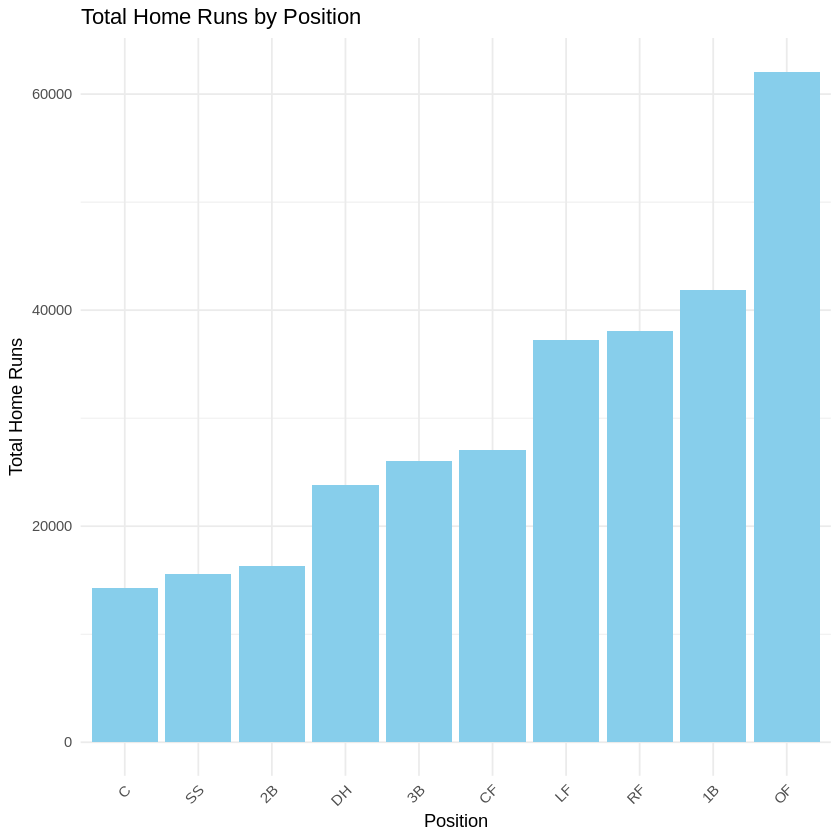

In [ ]:
# Group data by position and sum home runs (HR)
hr_by_position <- cleaned_data %>%
  group_by(POS) %>%
  summarise(total_HR = sum(HR, na.rm = TRUE)) %>%
  arrange(desc(total_HR))  # Sort in descending order of home runs

# Create a bar plot
ggplot(hr_by_position, aes(x = reorder(POS, total_HR), y = total_HR, fill = POS)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(
    title = "Total Home Runs by Position",
    x = "Position",
    y = "Total Home Runs"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for better readability

# A tibble: 10 × 2
   POS   total_triples
   <chr>         <int>
 1 OF            13484
 2 CF             8504
 3 LF             7948
 4 RF             7493
 5 2B             5652
 6 SS             5499
 7 3B             4711
 8 1B             4649
 9 DH             3794
10 C              1523


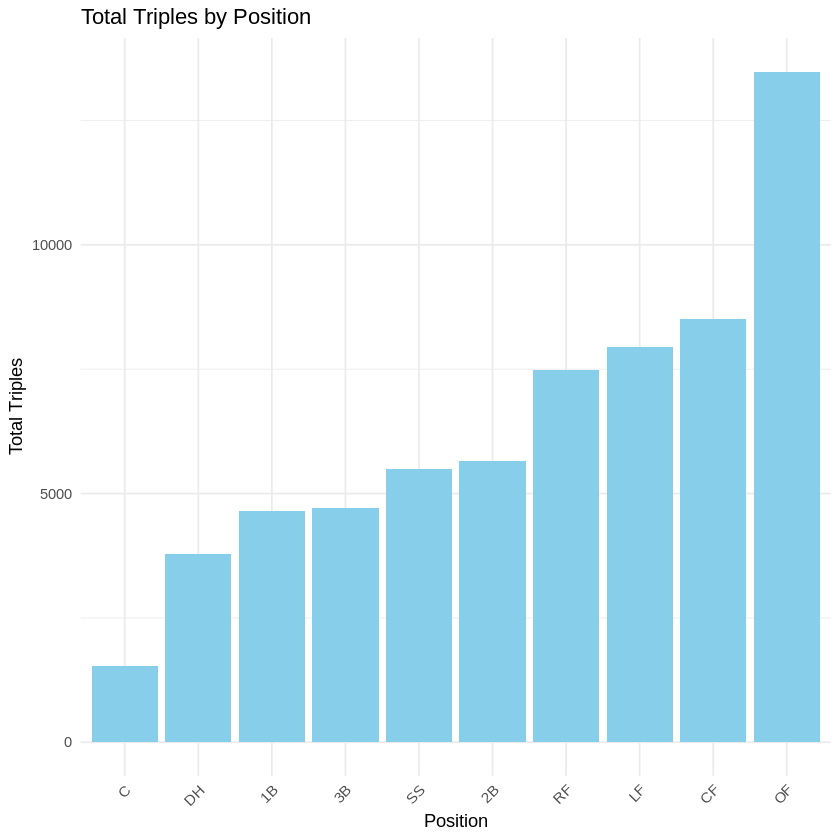

In [ ]:
# Group by position and calculate total triples (X3B) per position
triples_by_position <- cleaned_data %>%
  group_by(POS) %>%
  summarise(total_triples = sum(X3B, na.rm = TRUE)) %>%
  arrange(desc(total_triples))  # Sort in descending order of triples

# View the results
print(triples_by_position)

# Create a bar plot
ggplot(triples_by_position, aes(x = reorder(POS, total_triples), y = total_triples, fill = POS)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(
    title = "Total Triples by Position",
    x = "Position",
    y = "Total Triples"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for better readability

# A tibble: 10 × 2
   POS   total_doubles
   <chr>         <int>
 1 OF           100814
 2 1B            62677
 3 LF            62191
 4 RF            61186
 5 CF            49933
 6 3B            48479
 7 2B            42891
 8 SS            39096
 9 DH            36351
10 C             25427


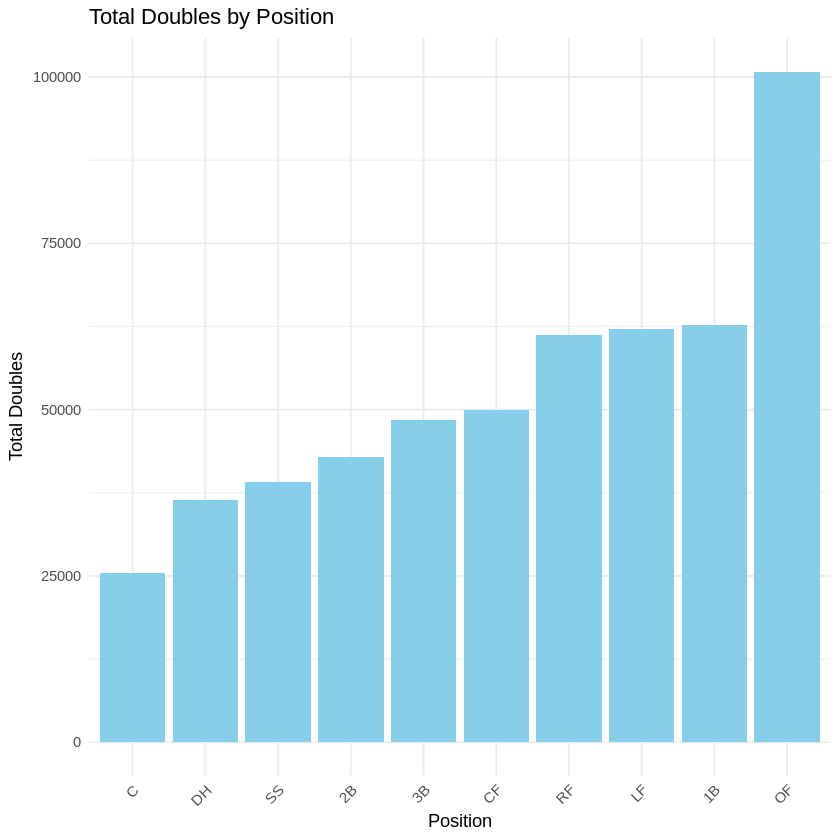

In [ ]:
# Group by position and calculate total doubles (X2B) per position
doubles_by_position <- cleaned_data %>%
  group_by(POS) %>%
  summarise(total_doubles = sum(X2B, na.rm = TRUE)) %>%
  arrange(desc(total_doubles))  # Sort in descending order of doubles

# View the results
print(doubles_by_position)

# Create a bar plot
ggplot(doubles_by_position, aes(x = reorder(POS, total_doubles), y = total_doubles, fill = POS)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(
    title = "Total Doubles by Position",
    x = "Position",
    y = "Total Doubles"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for better readability

# A tibble: 10 × 2
   POS   total_runs
   <chr>      <int>
 1 OF        281251
 2 LF        170893
 3 RF        166212
 4 1B        157337
 5 CF        147148
 6 3B        123140
 7 2B        114784
 8 SS        104954
 9 DH        102280
10 C          57009


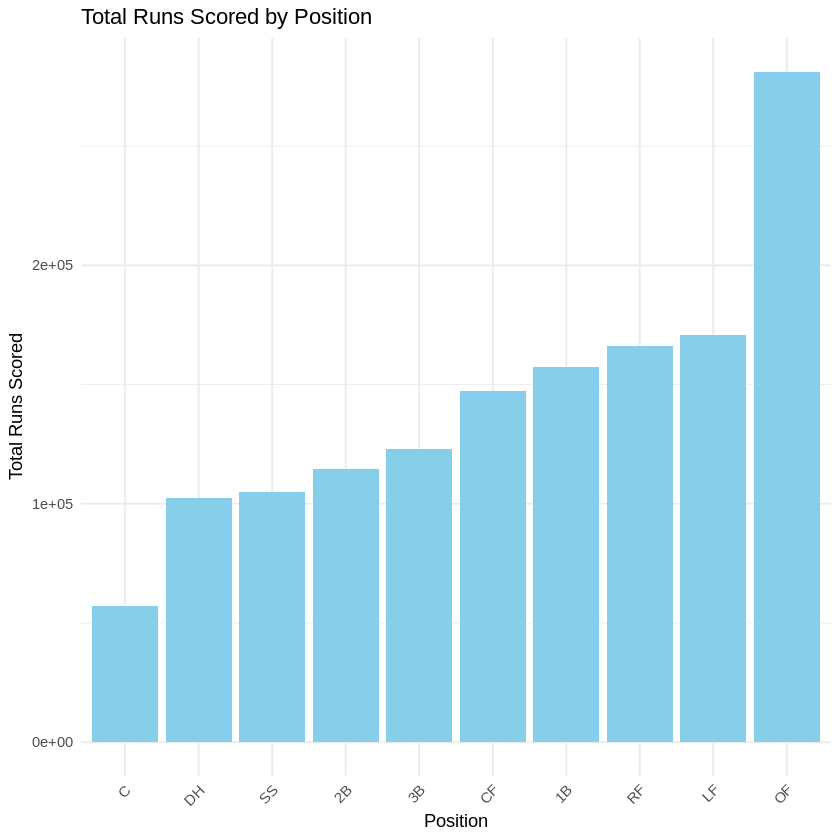

In [ ]:
# Group by position and calculate total runs (R) per position
runs_by_position <- cleaned_data %>%
  group_by(POS) %>%
  summarise(total_runs = sum(R, na.rm = TRUE)) %>%
  arrange(desc(total_runs))  # Sort in descending order of runs

# View the results
print(runs_by_position)

# Create a bar plot
ggplot(runs_by_position, aes(x = reorder(POS, total_runs), y = total_runs, fill = POS)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(
    title = "Total Runs Scored by Position",
    x = "Position",
    y = "Total Runs Scored"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for better readability

After viewing the bar charts for positions with the most and least homeruns, triples, doubles, and runs scored, it is very obvious to recognize that the Outfield (OF) position is the highest for every graph. The OF position includes players that play any outfield position. So, these players are not double counted in the Right Field (RF), Center Field (CF), and Left Field (LF) positions. Rather, we can tell from this bar chart that many outfielders are considered for all outfield positions than just a singular specificed outfield position.

Now that we understand why the Outfield (OF) position is the highest in each bar chart, let us look at the other positions.

Excluding the OF position, we make the following observations.
* The position with the highest number of Homeruns (HR) is First Base (1B).
* The position with the highest number of Triples (X3B) is Center Field (CF).
* The position with the highest number of Doubles (X2B) is First Base (1B).
* The position with the highest number of Runs Scored (R) is Left Field (LF)

* The position with the lowest number of Homeruns (HR), Triples (X3B) is Catcher (C), Doubles (X2B), and Runs Scored is Catcher (C).

We are most surprised that the First Base (1B) position has the highest in both Homeruns (HR) and Doubles (X2B). We expected all of them to have an outfielder position with the most of each one.